# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
       f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)


# To impute missing values and handle modeling
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# To build a logistic regression model
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import ClusterCentroids

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

!pip install lightgbm
import lightgbm as lgb


## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
card = pd.read_csv('/content/drive/My Drive/UTA - AIML/Project 3/BankChurners.csv')

In [5]:
data = card.copy()

## Data Overview

In [6]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000


Observations:

1.  Age has a large range of values i.e. 26 to 73.

2. Credit limit is between USD1438 to USD34516

3. More indept analysis is required.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Observation:
1.   The dataset have 21 columns and 10,127 observations in it
2.   There are 2 columns that have missing values, these are
     *   Education levels - 1519 missing values
     *   Marital Status - 749 missing values

In [9]:
# Checking for the percentage of missing values in the dataset to corroborate the above statement
(data.isnull().sum() / data.isnull().count() * 100)

,0
CLIENTNUM,0.000
Attrition_Flag,0.000
Customer_Age,0.000
Gender,0.000
Dependent_count,0.000
Education_Level,15.000
Marital_Status,7.396
Income_Category,0.000
Card_Category,0.000
Months_on_book,0.000


Observation:

1.   Education_Level column has about 15% missing values out of the total missing values observed.
2.   Marital_Status column has about 7% missing values as well.

As it has been shown in the previous lectures, these values will be imputed after splitting the data into train,validation and test sets appropriately.

In [10]:
# let's check for duplicate values in the data
data.duplicated().sum()

np.int64(0)

Observation:

There are no duplicated values in the dataset

In [11]:
# Showing the unique values of each columns
data.nunique()

,0
CLIENTNUM,10127
Attrition_Flag,2
Customer_Age,45
Gender,2
Dependent_count,6
Education_Level,6
Marital_Status,3
Income_Category,6
Card_Category,4
Months_on_book,44


Observation:

1.   Customer_Age has only 45 unique values, this is going to be interesting
2.   Almost half of the columns are categotical
3.   All other columns like Customer_Age, Credit_Limit and Total_Revolving_Bal etc. have continous values

In [12]:
# for each of the categorical columns, lets see the unique values in them
for i in data.columns:
    #print(i)
    if data[i].dtype==object:
        print(data[i].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' nan 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']
['Blue' 'Gold' 'Silver' 'Platinum']


Observation:

This shows the unique values contained in the string values in the following columns
1.   Attriction
2.   Gender
1.   Education_Level
2.   Marital_Status
1.   Income_Category
2.   Card_Category



In [13]:
# statistical summary of the non-numerical columns in the dataset
data.describe(exclude=np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


Observation:
1.   Existing Customers is the most-singular non-numerical values in the dataset
2.   Females, Graduate educated and married are the majority of the data when it is combined together.
3.   also those customers who had less than 40,000USD income a year and who is holding credit card type Blue is showing considerable weight as well.
5.   The missing values that have been observed above have been clearly seen to be in these non-statistical values in the dataset.
6.   Since these columns would play a key role in our model, the missing values in them would be dealt with before we build our model.

##Sanity checks

We can drop the column - ***CLIENTNUM*** because it's a unique number for each customer and will not add value to the model building.

In [14]:
# Dropping column - ID
data.drop(columns=["CLIENTNUM"], inplace=True)

Checking the count of each unique category in each of the categorical variables.

In [15]:
# Making a list of all catrgorical variables
cat_col = data.select_dtypes("object").columns.to_list()

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("*" * 40)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
****************************************
Gender
F    5358
M    4769
Name: count, dtype: int64
****************************************
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
****************************************
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
****************************************
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
****************************************
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
****************************************


In [16]:
# Get value counts
data["Attrition_Flag"].value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


Observation:

We have more female customers as compared to male customers.

1.   Platinum Card holders have only 20 observations in the dataset
2.   In the Attrition class, the distribution of classes in the target variable is imbalanced, meaning about 16% of the observations are attrited customers.
3.   Other observations have been commented on earlier in the previous observations above.

In [17]:
# viewing incorrect values in income column
data[data.Income_Category == "abc"]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,Existing Customer,45,F,2,Graduate,Married,abc,Blue,37,6,1,2,14470.000,1157,13313.000,0.966,1207,21,0.909,0.080
28,Existing Customer,44,F,3,Uneducated,Single,abc,Blue,34,5,2,2,10100.000,0,10100.000,0.525,1052,18,1.571,0.000
39,Attrited Customer,66,F,0,Doctorate,Married,abc,Blue,56,5,4,3,7882.000,605,7277.000,1.052,704,16,0.143,0.077
44,Existing Customer,38,F,4,Graduate,Single,abc,Blue,28,2,3,3,9830.000,2055,7775.000,0.977,1042,23,0.917,0.209
58,Existing Customer,44,F,5,Graduate,Married,abc,Blue,35,4,1,2,6273.000,978,5295.000,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,Attrited Customer,30,F,1,Graduate,Married,abc,Blue,18,4,1,4,4377.000,2517,1860.000,0.941,8759,74,0.609,0.575
10040,Attrited Customer,50,F,3,Doctorate,Single,abc,Blue,36,4,3,3,5173.000,0,5173.000,0.912,8757,68,0.789,0.000
10083,Existing Customer,42,F,4,Uneducated,Married,abc,Blue,23,4,1,2,8348.000,0,8348.000,0.695,15905,111,0.708,0.000
10092,Attrited Customer,40,F,3,Graduate,Married,abc,Blue,25,1,2,3,6888.000,1878,5010.000,1.059,9038,64,0.829,0.273


In [18]:
# replace values with missing
data.Income_Category.replace(to_replace="abc", value=np.nan, inplace=True)

In [19]:
# subset to view incorrect values
data[data.Income_Category == "abc"]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [20]:
# using MODE to fill the missing values in income column
data.Income_Category = data.Income_Category.fillna(value=data["Income_Category"].value_counts().index[0]
)

In [21]:
# replace values with missing values in income column
data.Income_Category.replace(to_replace="abc", value=np.nan, inplace=False)

,Income_Category
0,$60K - $80K
1,Less than $40K
2,$80K - $120K
3,Less than $40K
4,$60K - $80K
...,...
10122,$40K - $60K
10123,$40K - $60K
10124,Less than $40K
10125,$40K - $60K


In [22]:
# checking income value replacement
data.Income_Category.value_counts()

,count
Income_Category,
Less than $40K,4673
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


The income category column mode of ***Less than $40k*** have been used to fill all the "abc" values in the column.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

##Univariates Analysis

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

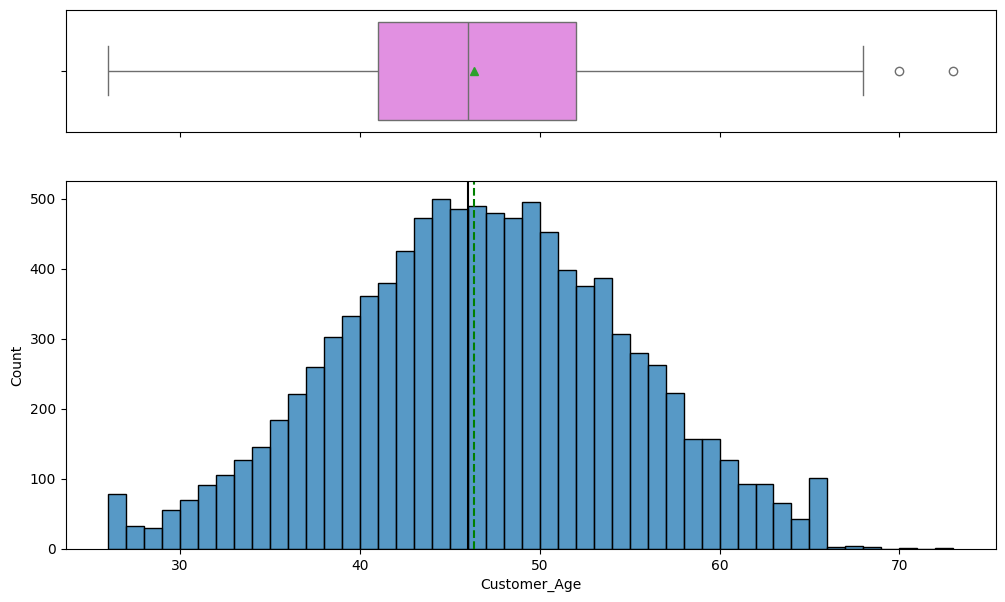

In [24]:
# Observations on Customer_age
histogram_boxplot(data, "Customer_Age")

Observation:
1.   The distribution of age is normal.
2.   The boxplot shows that there are outliers at the right end
3.   These outliers will not be removed because it shows that they are representative of the real trend in the market

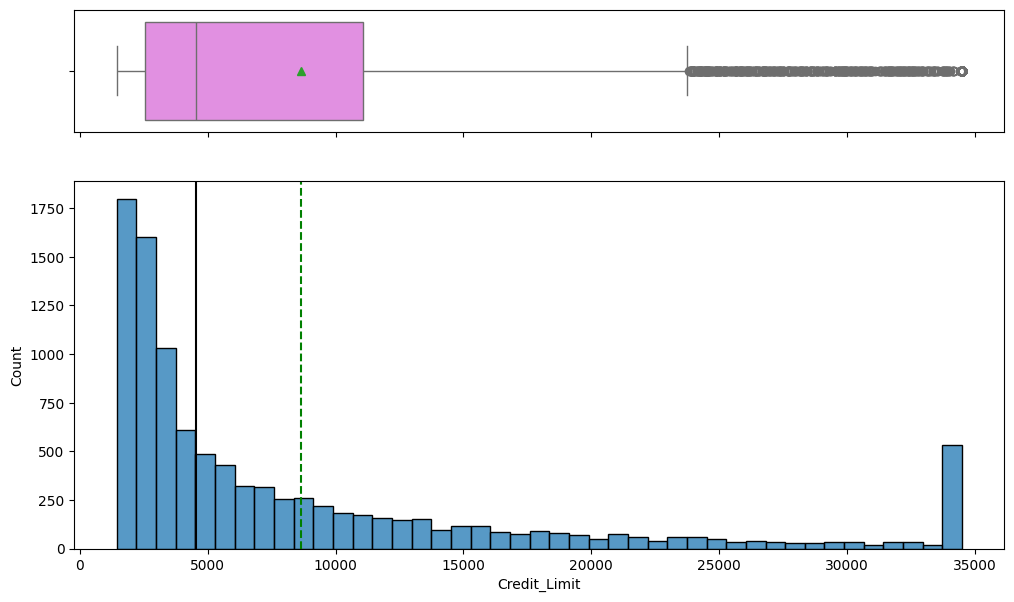

In [25]:
# observations on credit limit
histogram_boxplot(data, "Credit_Limit")

Observation:

1.   The distribution of the credit amount is right-skewed
2.   The boxplot shows that there are outliers at the right end
3.   Again, these outliers will not be removed because it shows that they are representative of the real trend in the market

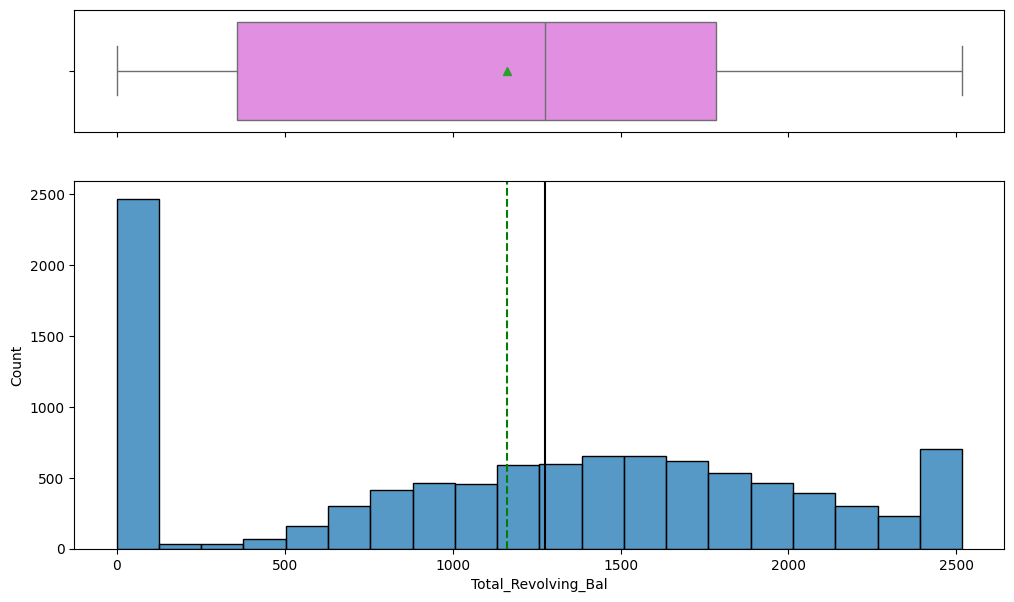

In [26]:
# observations on revolving balance
histogram_boxplot(data, "Total_Revolving_Bal")

###This answer EDA question 1
Observation:
1.   The distribution of the balance that carries over from one month to the next is the revolving balance for which the credit is given is somewhat normal.
2.   The boxplot shows that there are outliers at the left end
3.   Again, these outliers will not be removed because it shows that they are representative of the real trend in the market


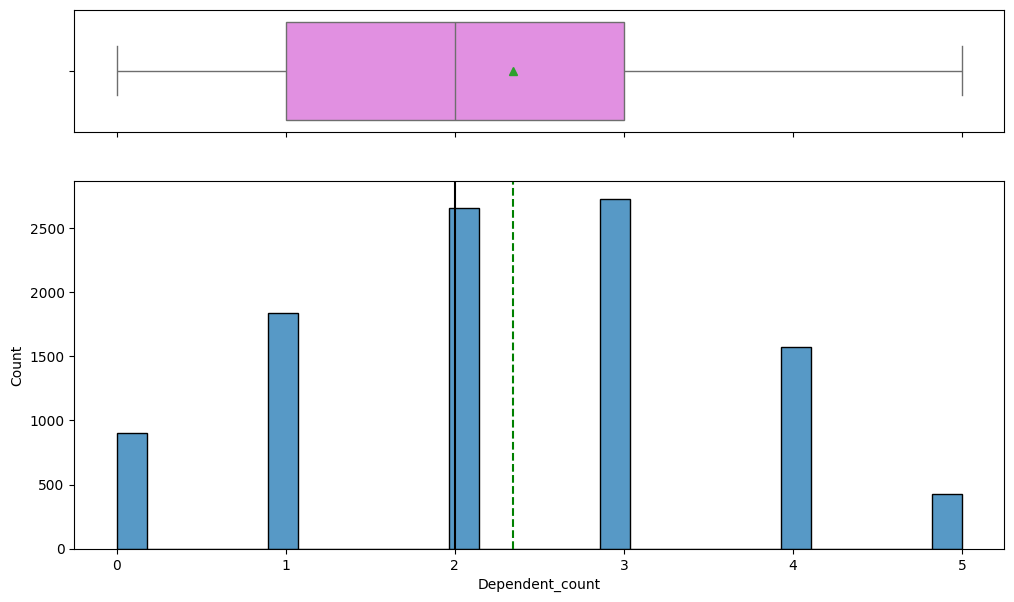

In [27]:
# observations on dependents counts
histogram_boxplot(data, "Dependent_count")

Observation:
1.   The distribution for the number of children per customer is roughly normal.
2.   As the median of the distribution is less than 3, more than 50% of customers have spent less than 3 on dependents.

In [28]:
# Checking 10 largest values of amount of credit limit
data.Total_Revolving_Bal.nlargest(10)

,Total_Revolving_Bal
3,2517
8,2517
18,2517
32,2517
42,2517
53,2517
76,2517
131,2517
133,2517
139,2517


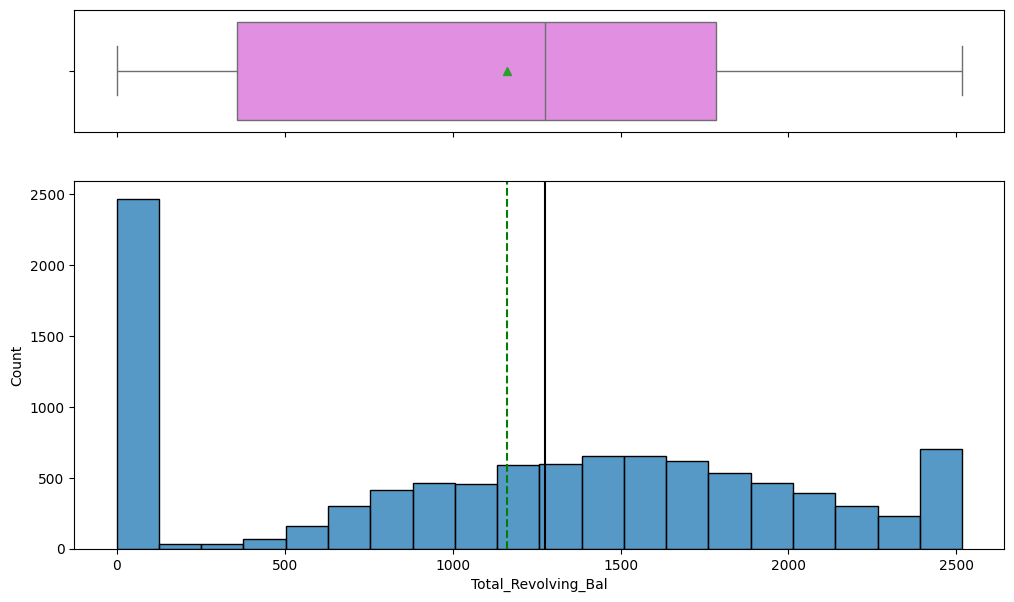

In [29]:
# observations on MntFishProducts
histogram_boxplot(data, "Total_Revolving_Bal")

Observation:
1.   The distribution for the Revolving balance maintained and carried over from one month to another month is slightly normal
2.   There is about 2500 customers who have maintained monthly total revolving balance of 0-100USD which is actually low balances.
3.   The rest of the customers have monthly balance ranging from 200USD to 2500USD.


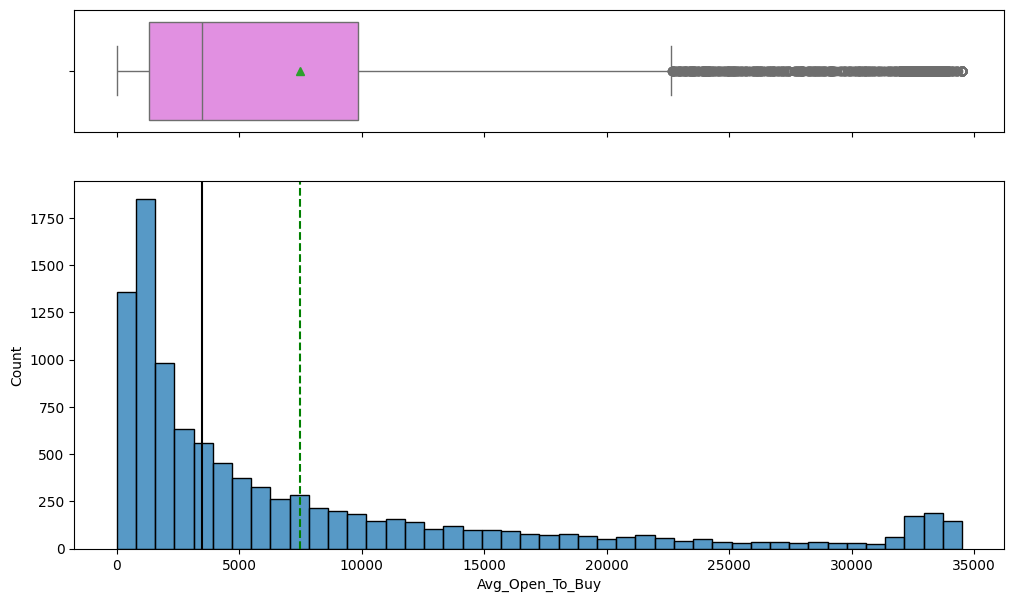

In [30]:
# observations on Avg_Open_To_Buy
histogram_boxplot(data, "Avg_Open_To_Buy")

Observation:
1.   The distribution for the amount left on the credit card to use (Average of last 12 months) is skewed to the right.
2.   There is many observations to the extreme right which can be considered as observed as outliers.
3.   Again, these outliers will not be removed because it shows that they are representative of the real trend in the market

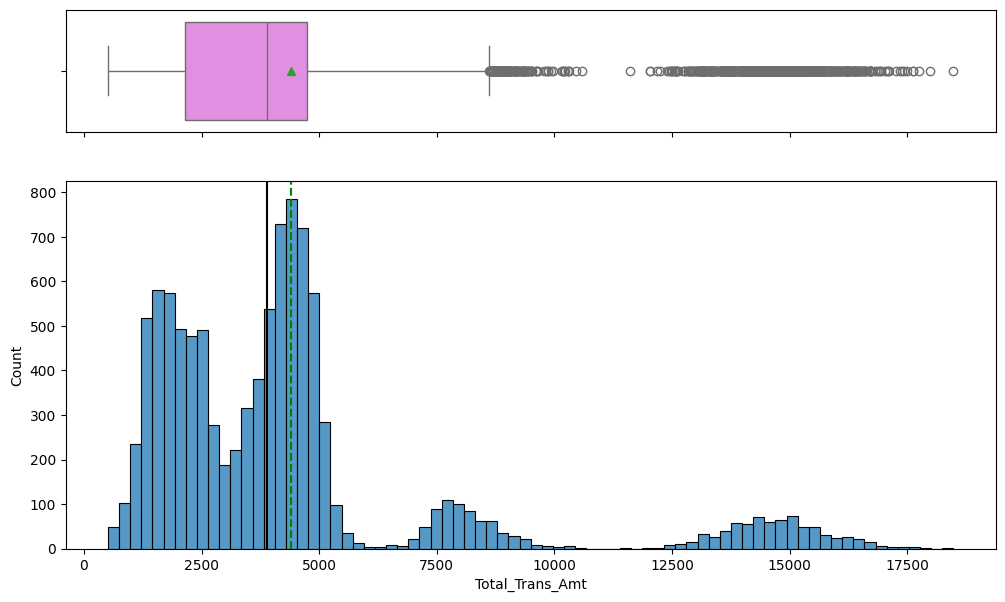

In [31]:
# observations on Total_Trans_Amt
histogram_boxplot(data, "Total_Trans_Amt")

###This answer EDA question 1

Observation:

1.   The distribution for the Total Transaction Amount (Last 12 months) is skewed to the right
2.   There are many outliers in the amount spent of 10000 and more from 12500 and above.
3.   Again, these outliers will not be removed because it shows that they are representative of the real trend in the market

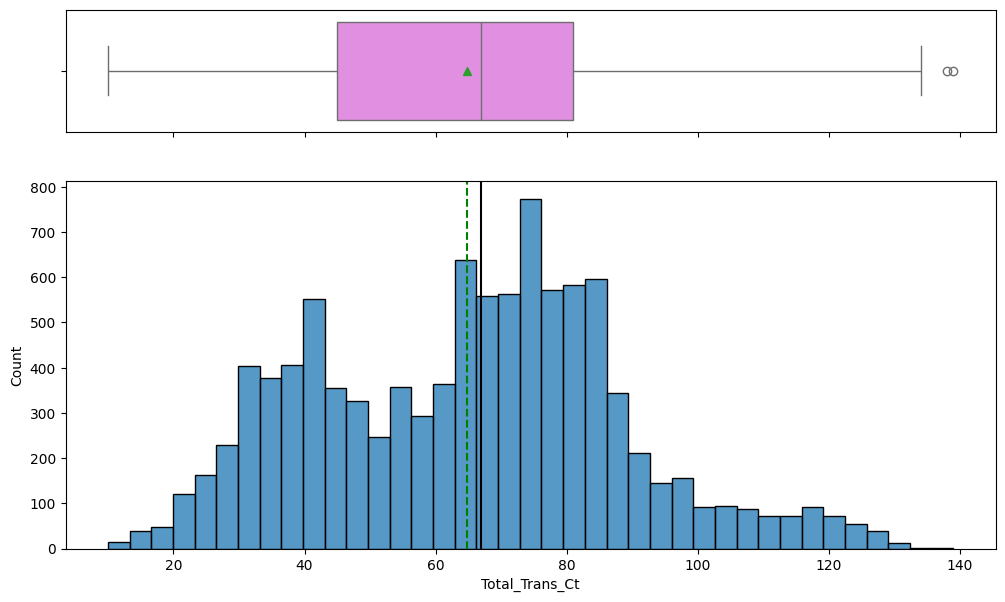

In [32]:
# observations on Total_Trans_Ct
histogram_boxplot(data, "Total_Trans_Ct")

Observations:
1.   Most of the customers have over 65 transactions in the last 12 months.
2.   There are some extreme values in the far right end whixh can be regarded as outliers not a thick one

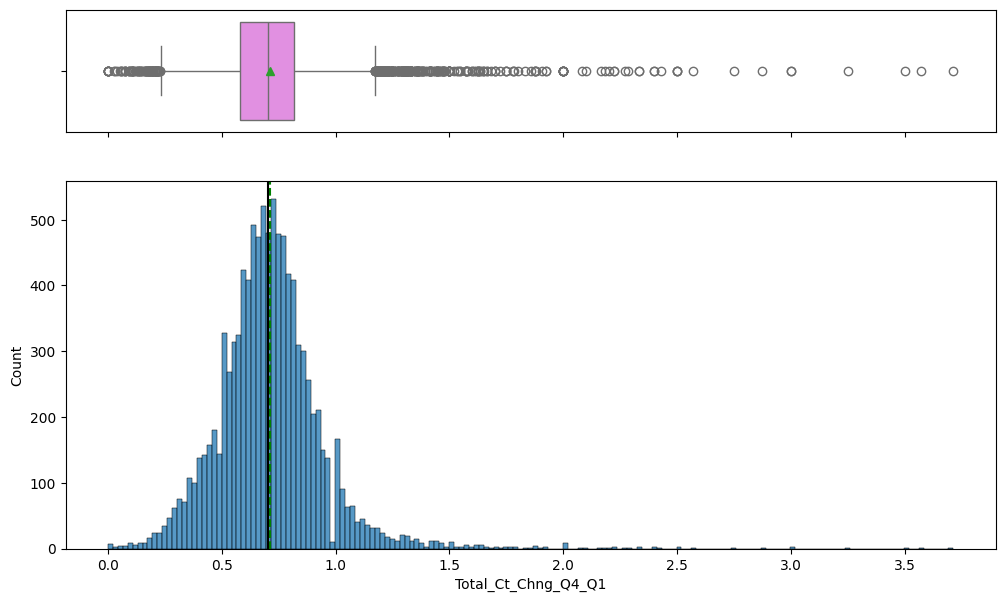

In [33]:
# observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

###This answer EDA question 4

Observation:
1.   The median of the distribution is 0.6, meaning 50% of customers have less than or equals to 0.6 (about 500 observations) ratio ***between*** the total transaction count in the 4th quarter of the year and the total transaction count in 1st quarter of the year.
2.   There are extreme observations in the variable constituting to be extreme outliers.

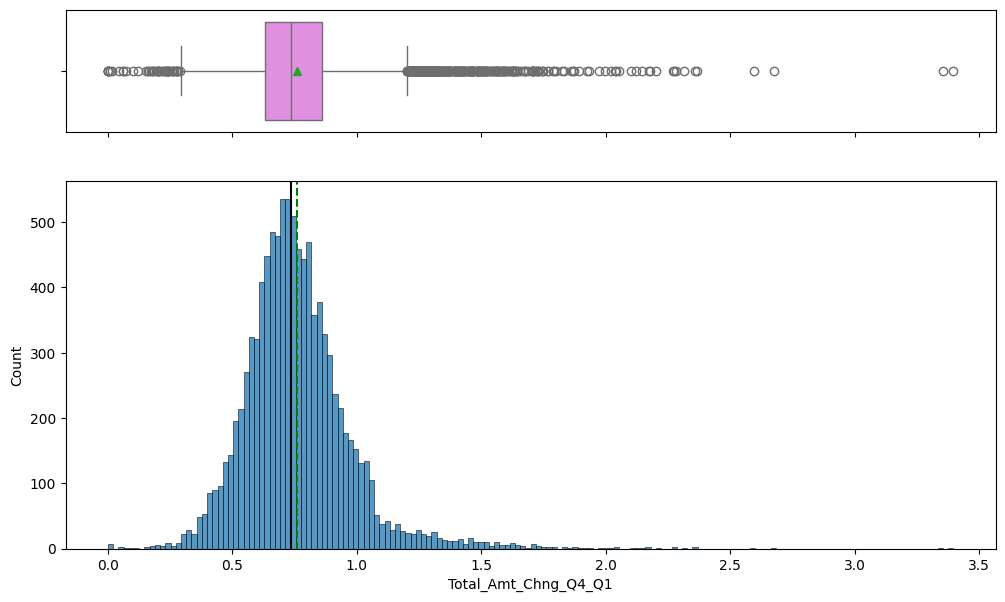

In [34]:
# observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

Observation;
1.   The distribution is right skewed
2.   The median of the distribution is around 0.75 for the ratio ***between*** the total transaction amount in 4th quarter of the year and the total transaction amount in 1st quarter of the year.
3.   There are many extreme observations in this variable, and it is similar in appearance with the ***"total_count_change"*** visualization above.

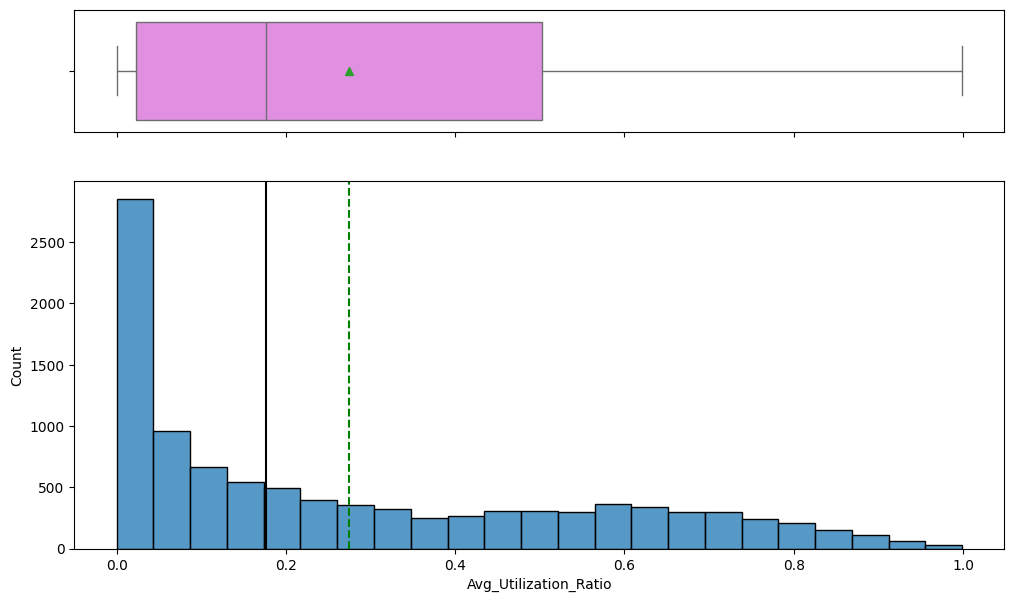

In [35]:
# observations on Avg_Utilization_Ratio
histogram_boxplot(data, "Avg_Utilization_Ratio")

Observation:
1.   This column shows few observations with values greater than 0.8 ratio of how much of customers' available credit they have spent. So it means that the average percentage customer uses on average of their total credit is 28%
2.   The distribution is right skewed.
3.   There are no outliers in his varable.

##Now lets consider categorical non-statistical variables

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 6))
    else:
        plt.figure(figsize=(n + 1, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

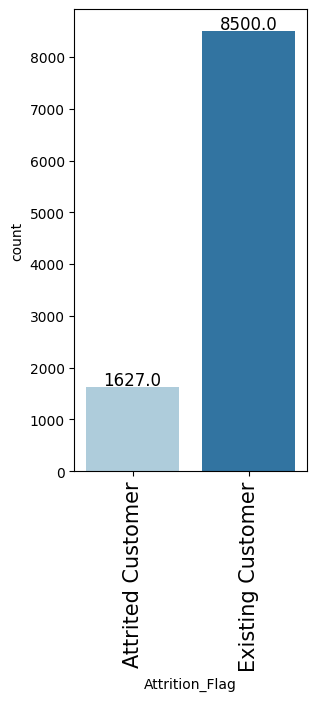

In [37]:
# observations on Attrition_Flag
labeled_barplot(data, "Attrition_Flag")

Observations:
1.   Most customers are Existing customers, 83% observations for Existing Customers and 16% observations for Attrtioners
2.   This class distribution in the target variable is surely imbalanced.

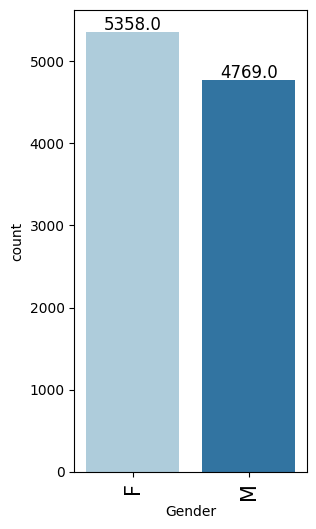

In [38]:
# observations on Gender
labeled_barplot(data, "Gender")

Observation:
1.   Female customers are taking more credit cards than male customers
2.   There are about 47% male customers and 53% are the female customers in the distribution

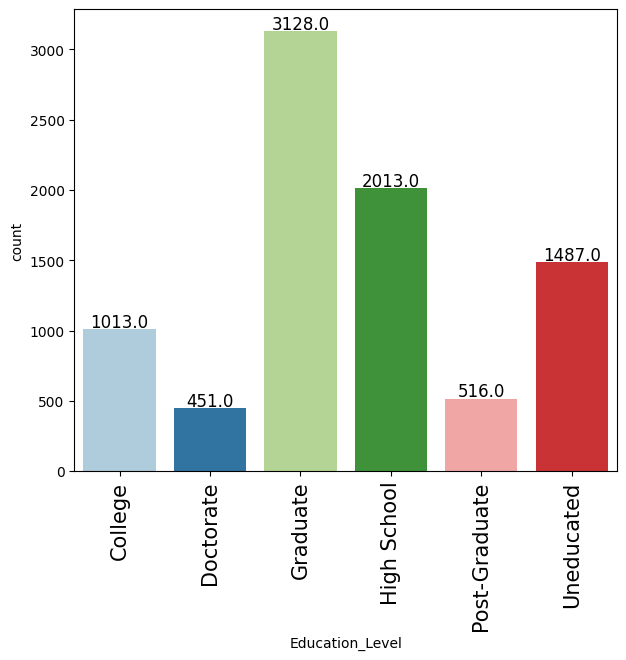

In [39]:
# observations on education level
labeled_barplot(data, "Education_Level")

###This answer EDA question 2

Observation:
1.   Most customers, approx. 31%, who take credit cards have their Graduate degree educational level.
2.   Approx 19% of customers are high school graduands.
3.   There are only 14% of customers who uneducated.
4.   All other education levels (College, doctorate and post-graduate) seem not to have qualification for a credit card based on the information provided and observed here.

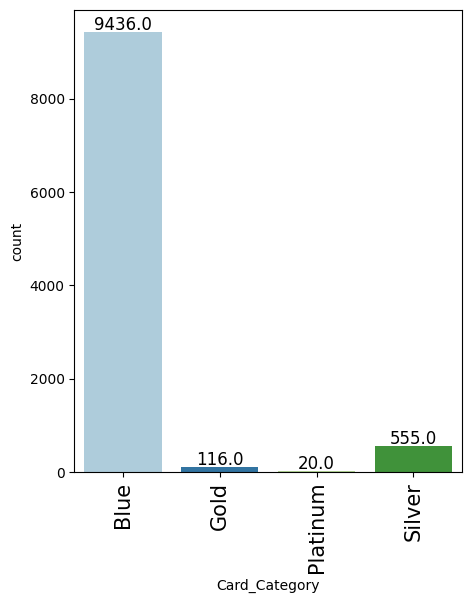

In [40]:
# observations on card category
labeled_barplot(data, "Card_Category")

Observation:
1.   94% of the customers using cards fall into the Blue category.
2.   1% of customers falls into the Gold category. It is convenient to conclude that these customers may have high credit score or high income
3.   The rest of the customers are in the Platinum and Silver categories.

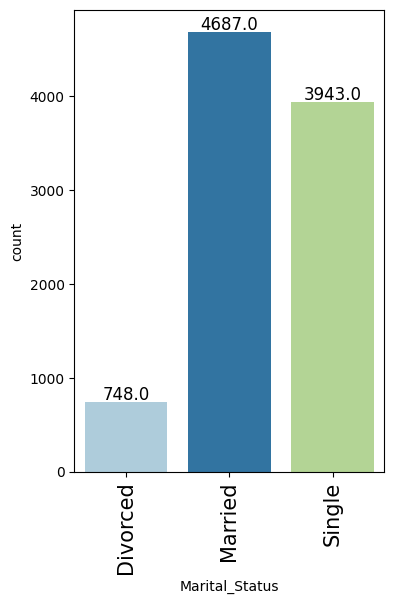

In [41]:
# observations on marital status
labeled_barplot(data, "Marital_Status")

Observation:
1.   About 46% of customers are married which may have comprises of joint accountholders.
2.   39% of customer are single.
3.   The lowest are the divored customers.

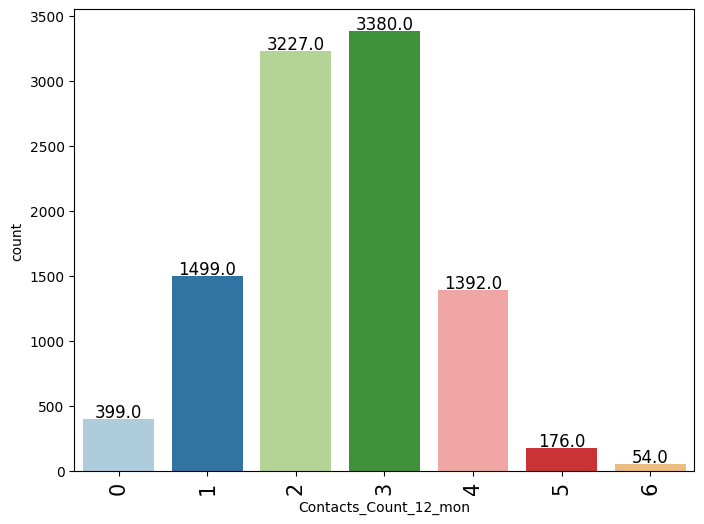

In [42]:
# observations on Contact counts with the last 12 months
labeled_barplot(data, "Contacts_Count_12_mon")

Observation:
1.   The plot shows that most customers have had 3 No. of Contacts between the customer and bank in the last 12 months, followed by 2 No. of Contacts
2.   Approximately just 34% of customers have had 0, 1, 4, 5 and 6 No. of contacts with thebank within the last 12 months covered by the dataset.

##Bivariates Analysis

###Box Plots

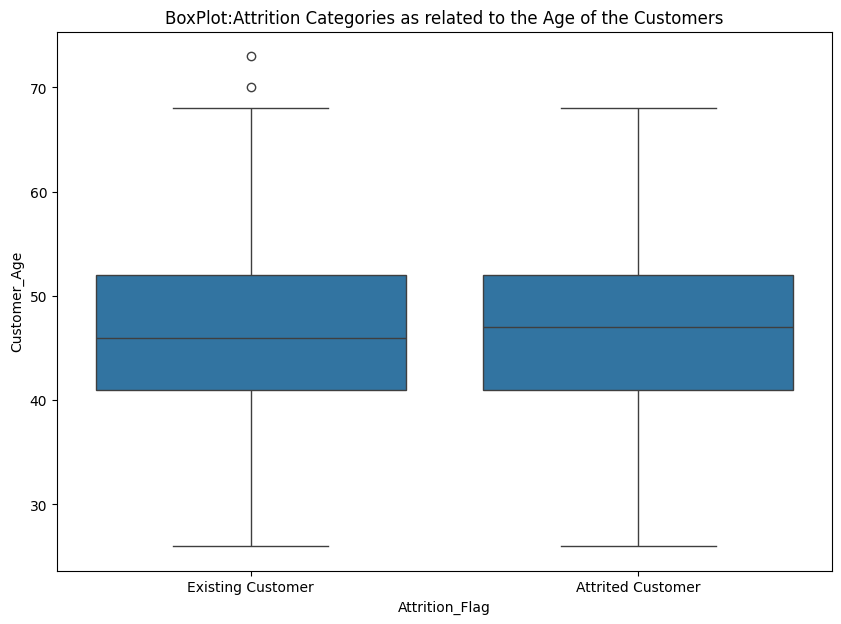

In [43]:
# box plots on 2 variables
plt.figure(figsize=(10, 7))
plt.title('BoxPlot:Attrition Categories as related to the Age of the Customers')
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=data, orient="vertical");

Observation:
1.   The median age of attrited customers is higher than the median age of non-attritees.
2.   The younger a customer is the more likely it is for them to stay as customers
3.   There are outliers in boxplots of only existing customers, the others does not have outliers.

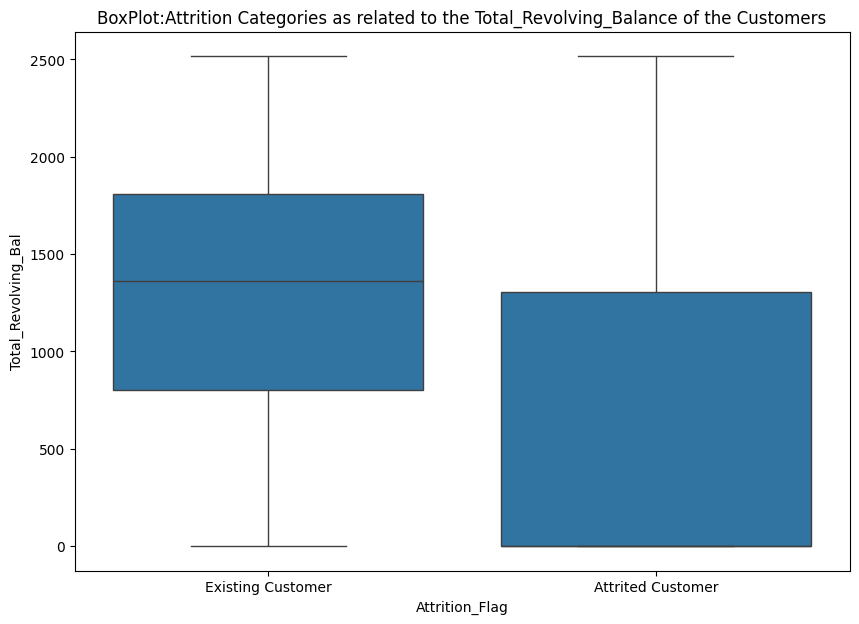

In [44]:
plt.figure(figsize=(10, 7))
plt.title('BoxPlot:Attrition Categories as related to the Total_Revolving_Balance of the Customers')
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=data, orient="vertical");

Observation:
1.   As it can be observed, the second and third quartile Total balance of existing customers is much more than the second and third quartile total balance of attrited customers. This shows that customers with high balances of month-to-month total balance are more likely to stay as existing customers.

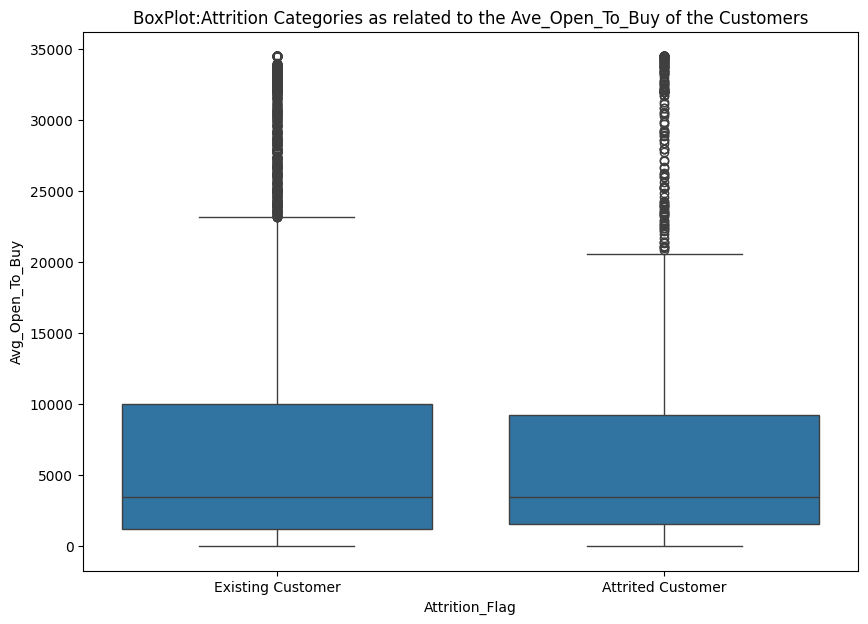

In [45]:
plt.figure(figsize=(10, 7))
plt.title('BoxPlot:Attrition Categories as related to the Ave_Open_To_Buy of the Customers')
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy", data=data);

Observation:


1.   The boxplot above shows that customers with higher amount left on the credit card to use (Average of last 12 months) are more likely to be existing customers.
2.   There are outliers in the distribution.
3.   The attrited customers outliers begin at a lower amount left in the credit card which may suggest that those customers tended to not use up all their monthly credit before the nd of the cut-off period.

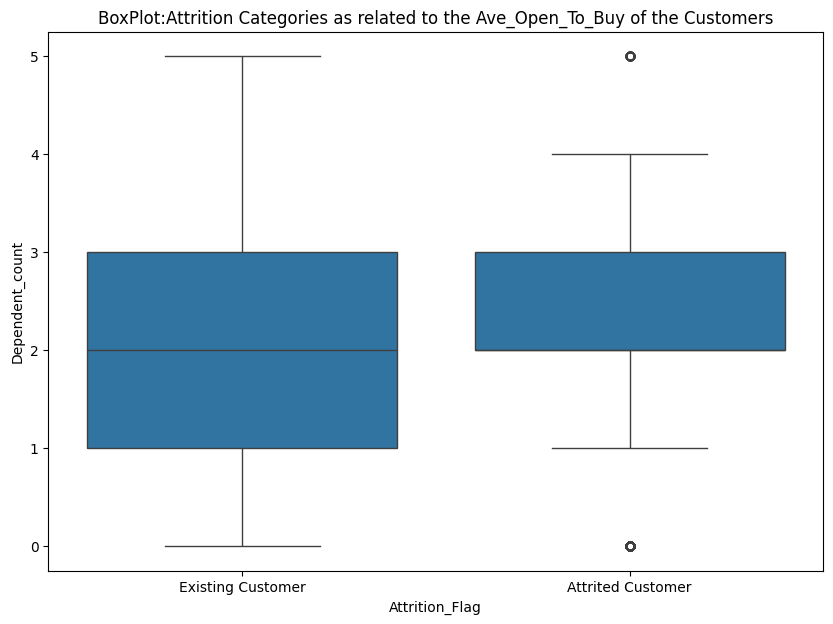

In [46]:
plt.figure(figsize=(10, 7))
plt.title('BoxPlot:Attrition Categories as related to the Ave_Open_To_Buy of the Customers')
sns.boxplot(x="Attrition_Flag", y="Dependent_count", data=data);

Observation:
1.   Customers who have dependents of up to 3 are more than likely to remain existing customers
2.   However, customers with 0 depedent are more likely to be attrited

In [47]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 80)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 3))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [48]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 7))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target variable=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target variable=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Customer_Age                                               
All                          1627               8500  10127
43                             85                388    473
48                             85                387    472
44                             84                416    500
46                             82                408    490
49                             79                416    495
45                             79                407    486
41                             76                303    379
47                             76                403    479
50                             71                381    452
54                             69                238    307
40                             64                297    361
42                             62                364    426
53                             59                328    387
52                             58       

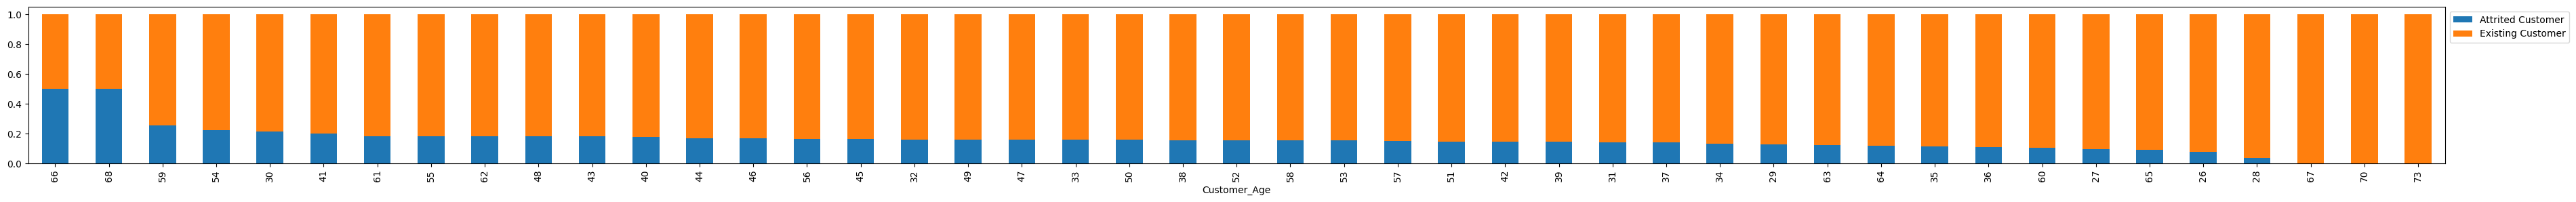

In [49]:
stacked_barplot(data, "Customer_Age", "Attrition_Flag");

Observation:

1.  Customers whose age is 48 have more attrited values that other age groups

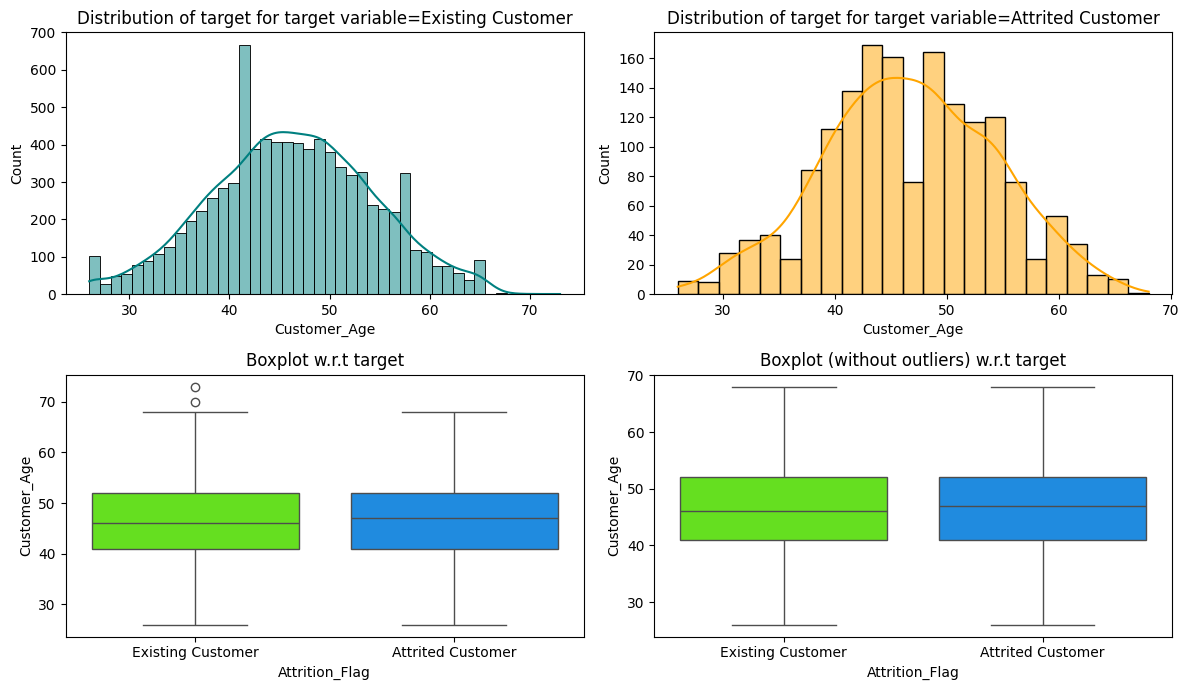

In [50]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag");

Observation:
1.   Older customers tend to be existing customers. Younger people appear to be more prone to looking for new and better credit options.
2.   40-year-olds take up the majority of the dataset.
3.   43 - 48 year olds have tendency to become attrite.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
--------------------------------------------------------------------------------


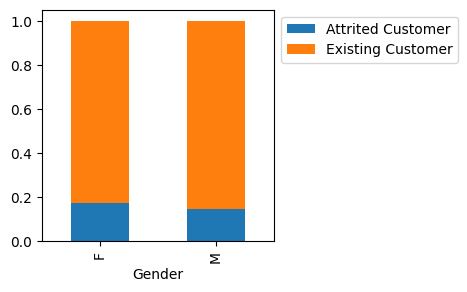

In [51]:
stacked_barplot(data, "Gender", "Attrition_Flag")

Observation:
1.   There is no significant difference concerning the ratio of gender amongst existing and attited customers.
2.   But as was observed early on, this dataset is skewed towards females. Therefore, more analysis will show why they tend to make more decisions to attrite.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
--------------------------------------------------------------------------------


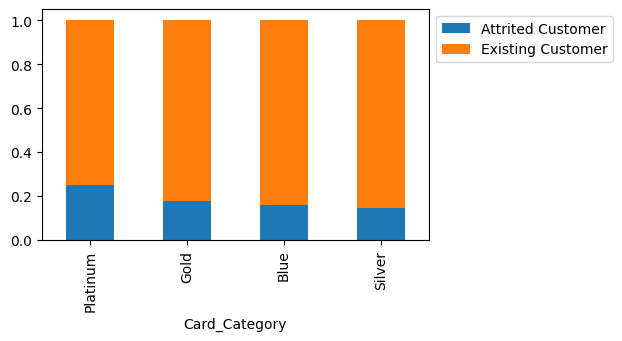

In [52]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

Observation:
1.   Customers with Platinum or Gold cards are more likley to attrit.
2.   Customers owning a Silver or Blue card are less likely to attrit


Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
--------------------------------------------------------------------------------


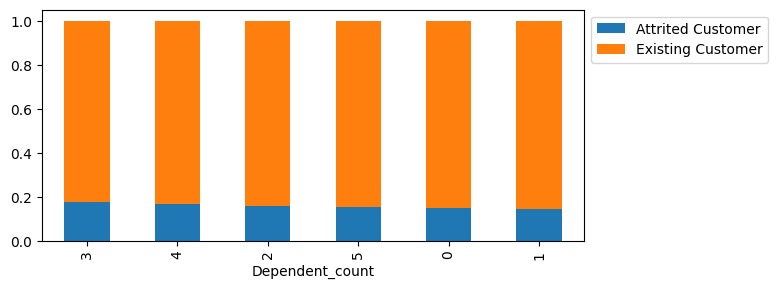

In [53]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

Observation:
1.   The plot shows that there is little difference in the ratio of existing customers and attrited customers per the number of dependents.
2.   But customers with 3 and/or 4 dependents have a slightly higher chance of attrition than others.


Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
--------------------------------------------------------------------------------


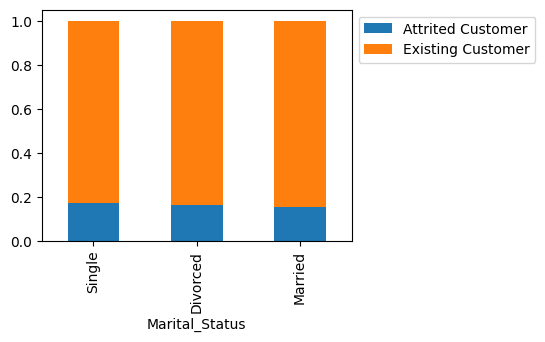

In [54]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

Observation:
1.   Customers who who are single have a less likely attrition rate than non-singles.
2.   Married people (married and divorced combined) make up most attritees.

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
--------------------------------------------------------------------------------


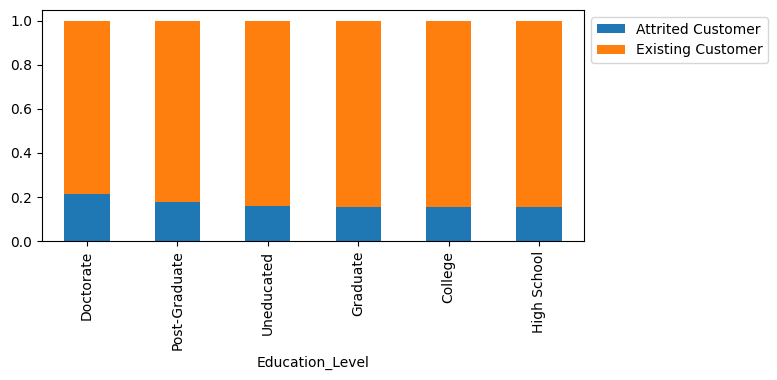

In [55]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

Observation:

1.  There customers who are Graduates are more likely to attrite than others.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 799               3874   4673
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
$120K +                        126                601    727
--------------------------------------------------------------------------------


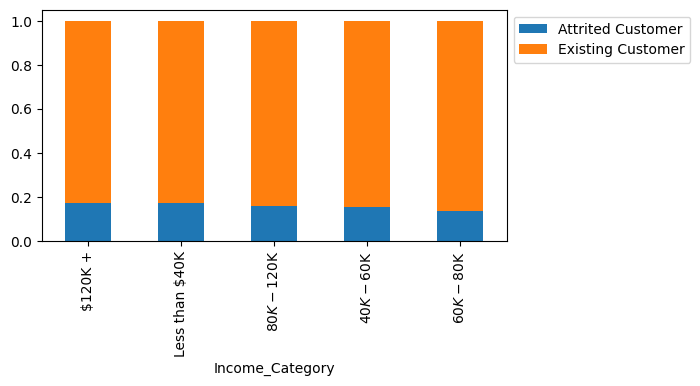

In [56]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

###This asnwer EDA question 3

Observation:

1.  The dataset show 5 categories of income levels.

2. Income level of less than 40,000 is more likely to churn than others.

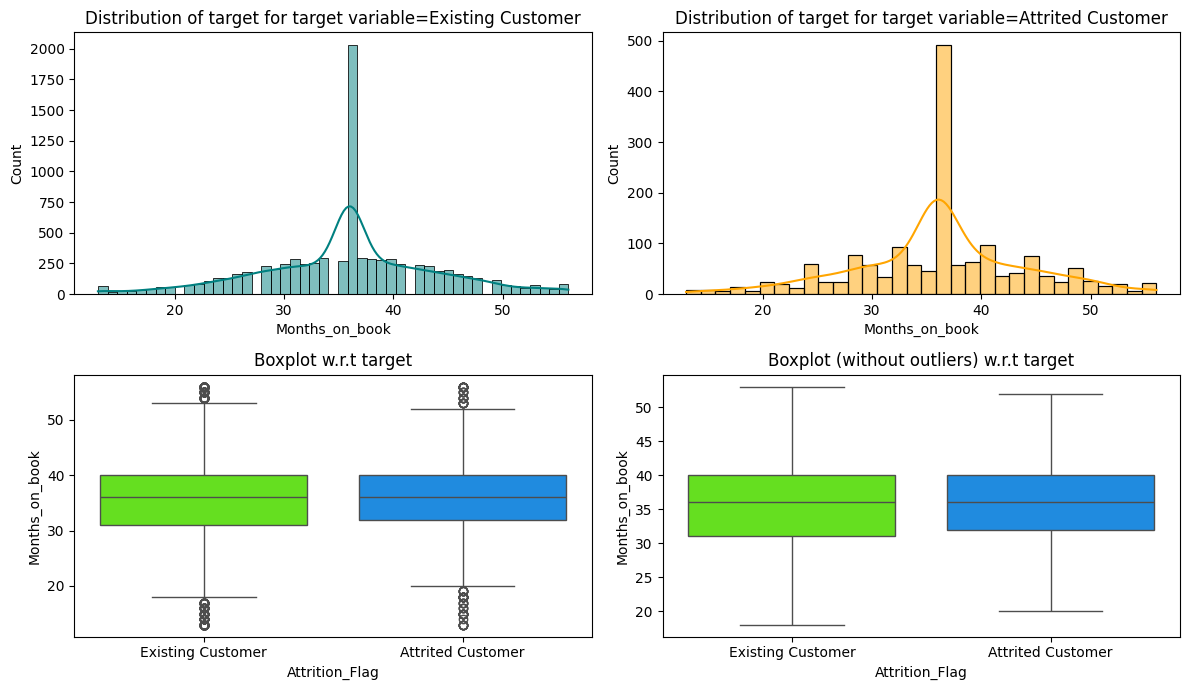

In [57]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

Observation:

1. The dataset shows that about 38 months on books customers have attritted.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
--------------------------------------------------------------------------------


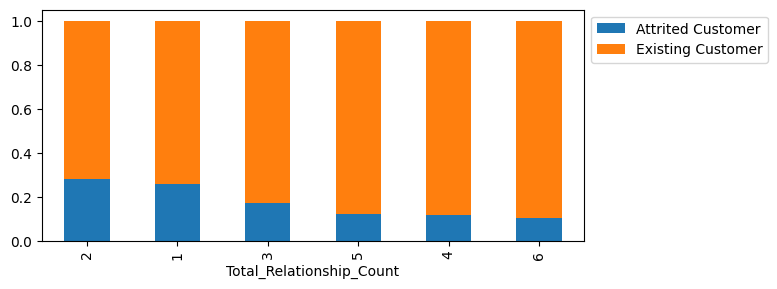

In [58]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

ObservationL

1.  Customers who have 1-3 total relationship counts have more propensity to attrit than others.

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
--------------------------------------------------------------------------------


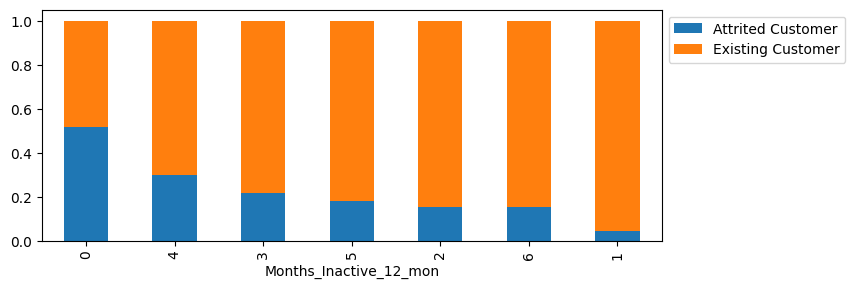

In [59]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

###This answer EDA question 5

Observation:

1.  Customers who have 2-4 months of total inactive months will attrit.

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
--------------------------------------------------------------------------------


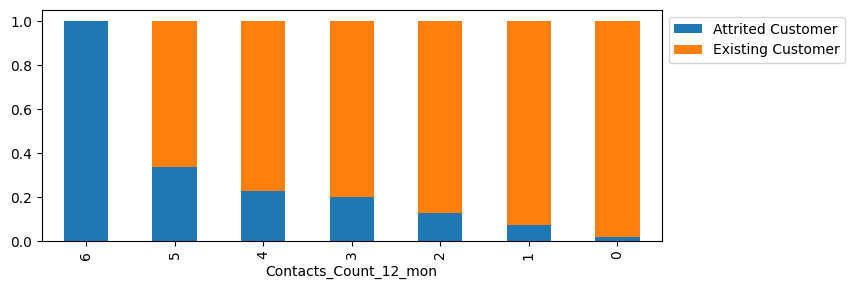

In [60]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

Observation:

1.  The customers who have 2-3 total contacts is more likely to churn the bank.

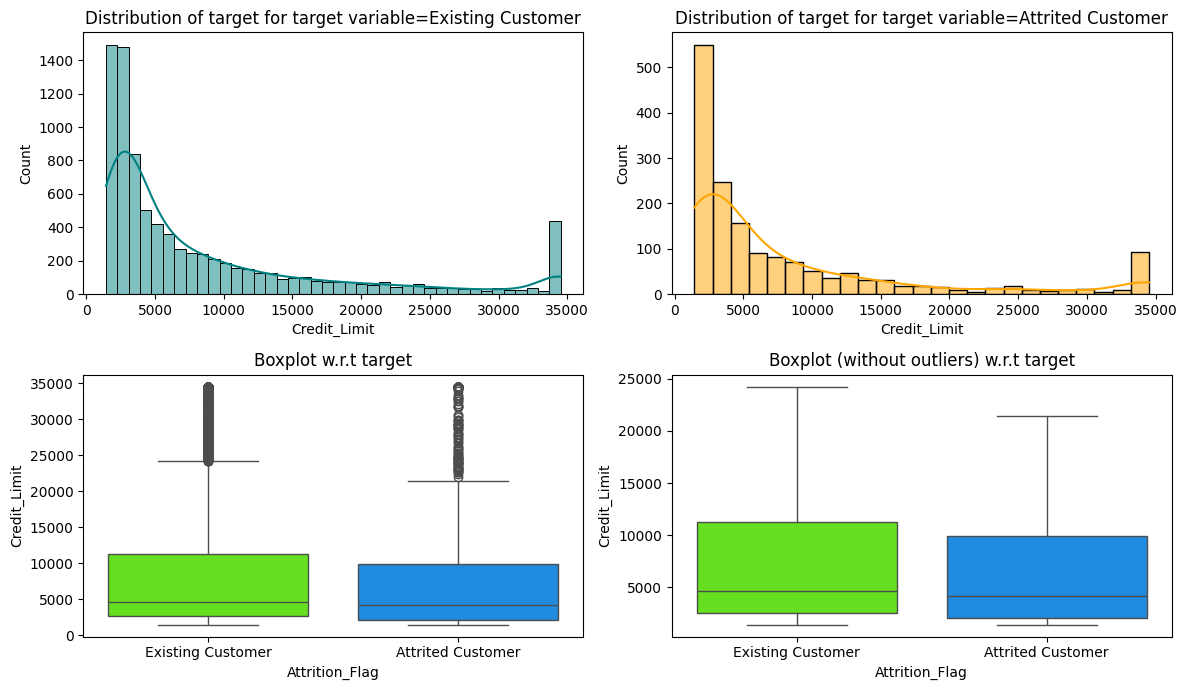

In [61]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

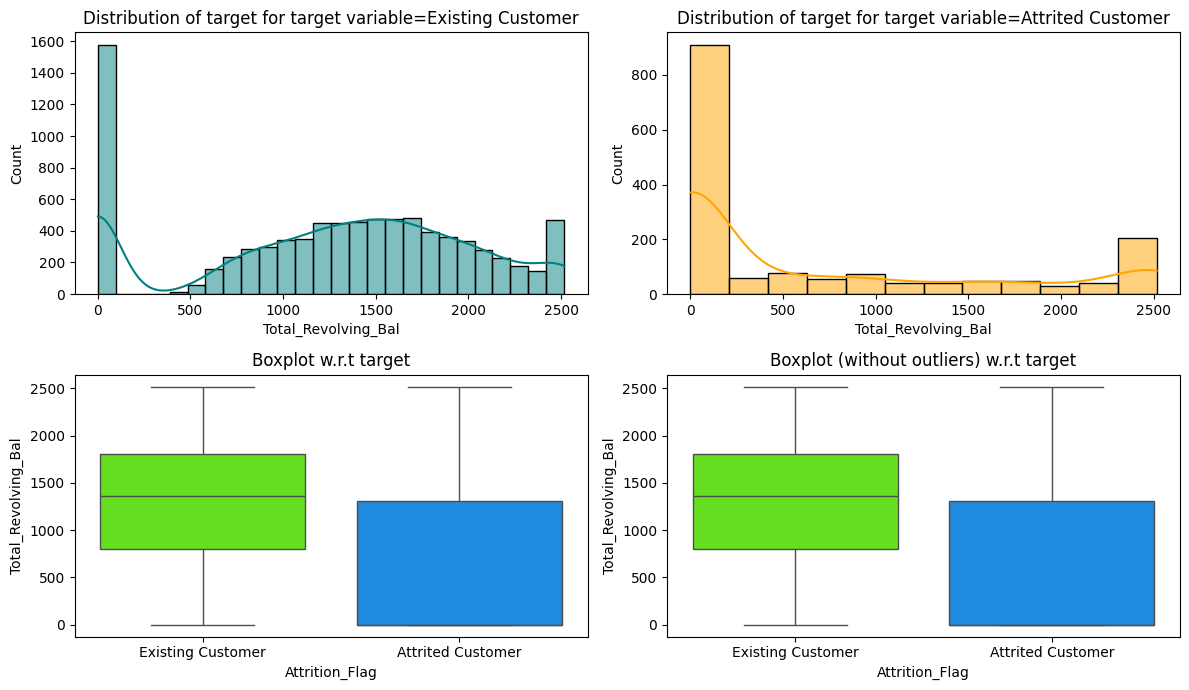

In [62]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

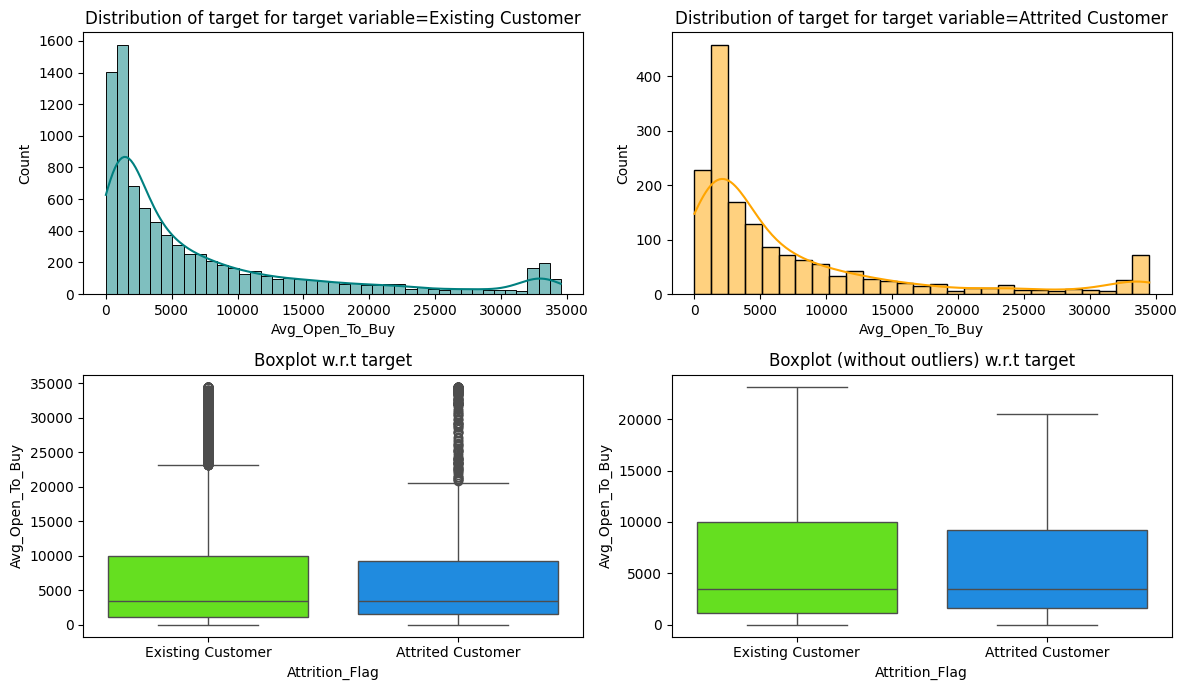

In [63]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

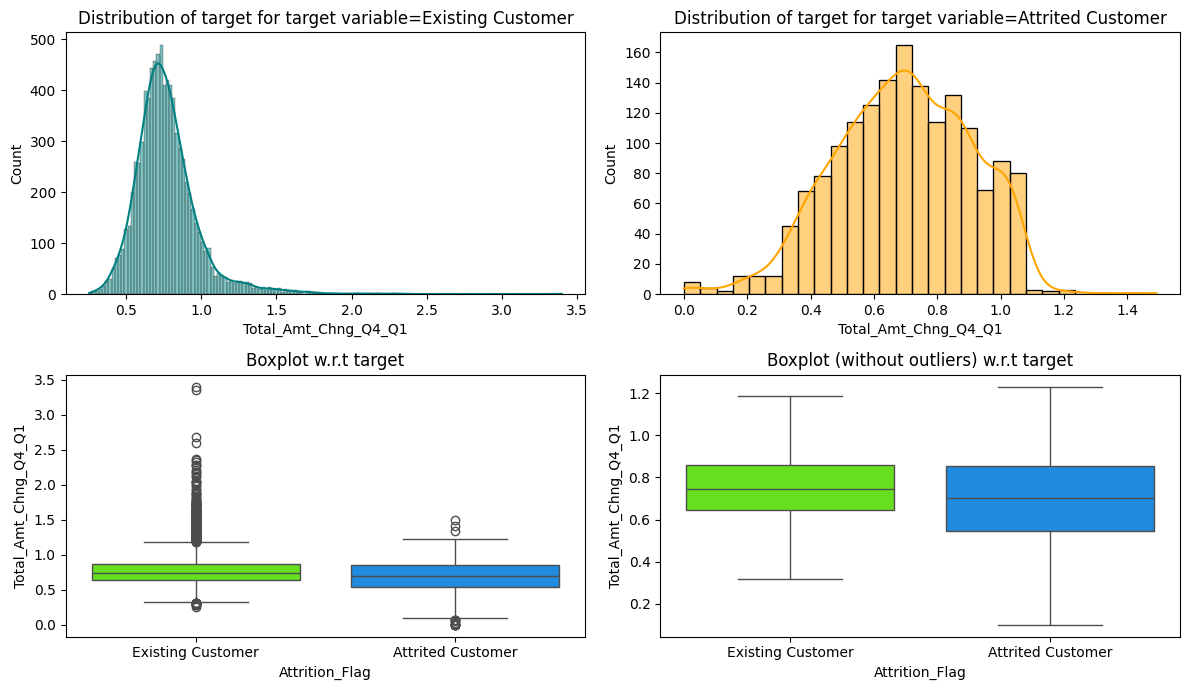

In [64]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

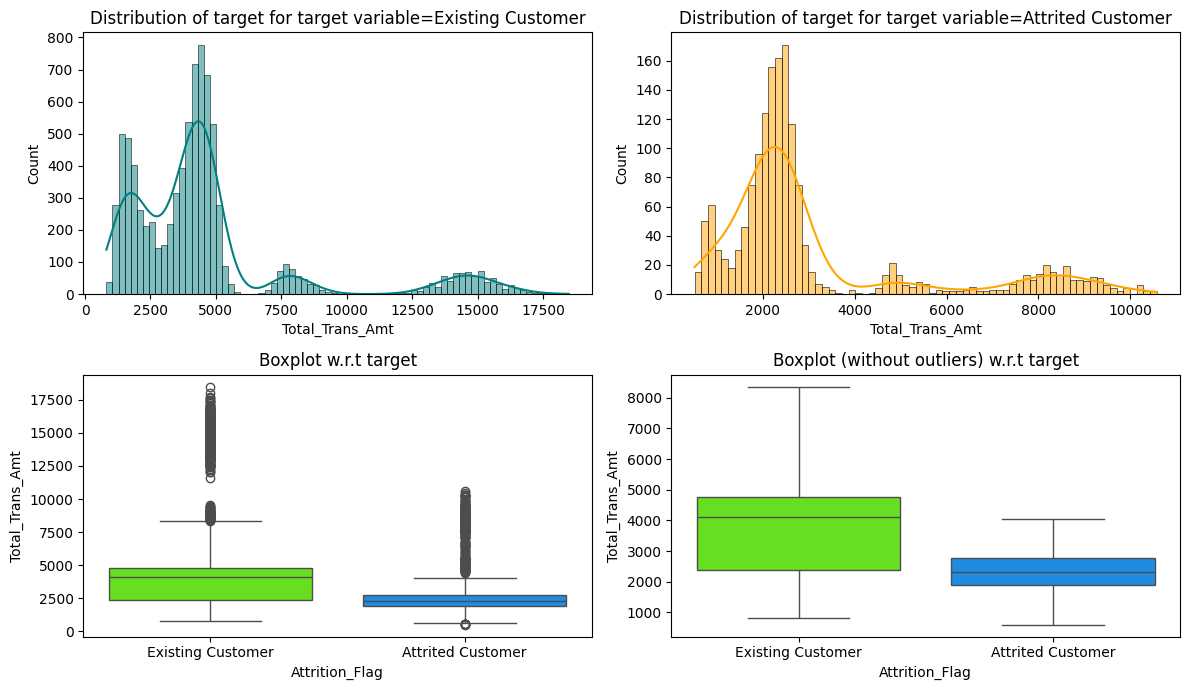

In [65]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

Observation:

1.  This variable have a bi-normal distribution and with 4 peaks.

2.  The distribution of values is well spread within the variable.

3.  The boxplot shows outliers in the variable and the outliers is quite large.

4.  Most of the customers behaved outside the ordinary observations in the variable.


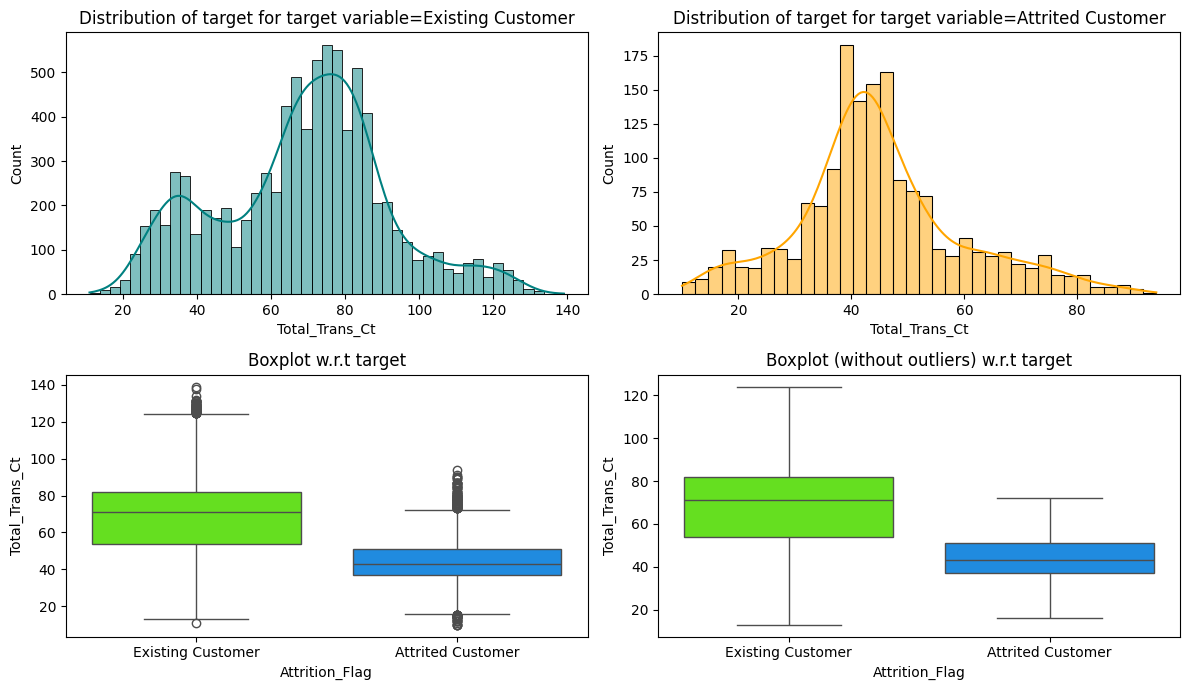

In [66]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

Observation:

1.  This variable have a normal distribution and its it slighly skewed to the right.

2.  The boxplot shows outliers in the variable.

3.  Few customers behaved outside the ordinary observations in the variable.

4.  The normalized boxplot without outliers shows that the attrited customers customers have less total tarnsaction counts than existing ones.

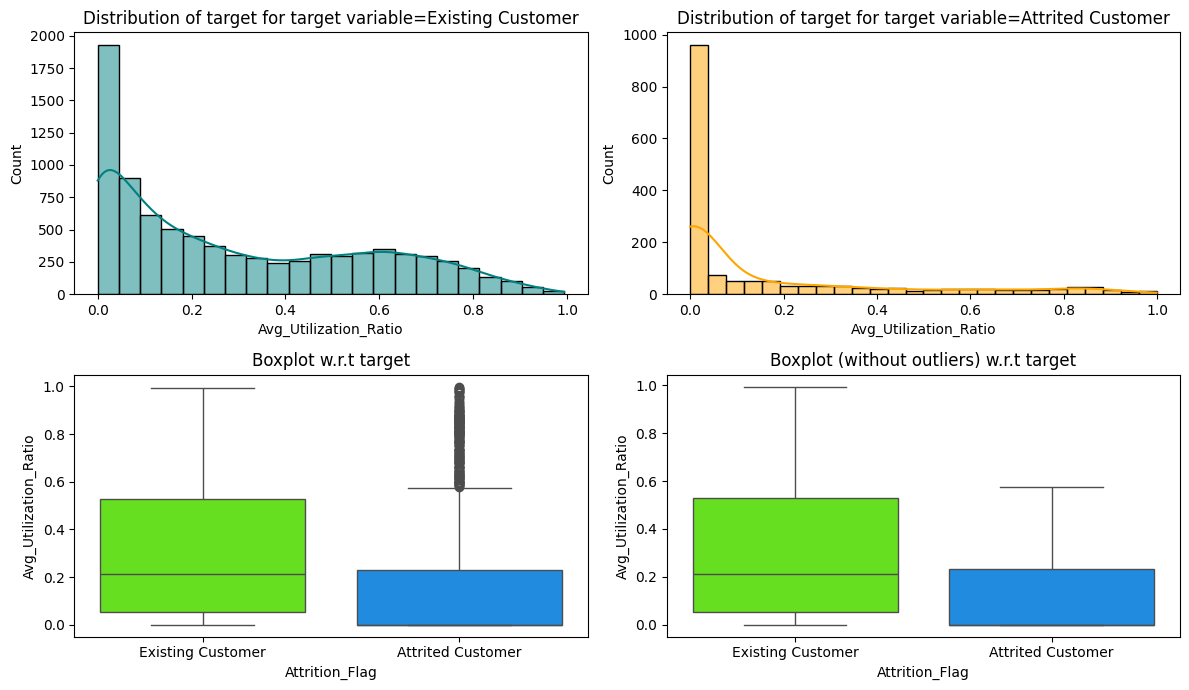

In [67]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

Observation:

1.  This variable have a not normal distribution and its it heavily skewed to the right.

2.  Both existing and attrited customers have very low average utilization ratio.

2.  The boxplot with resoect to our target variable shows outliers in the variable and the outliers is quite large.

3.  Most of the customers behaved outside the ordinary observations in the variable.

4.  There is very low next to thing values in the boxplot without outliers shows that the average utilization is 0

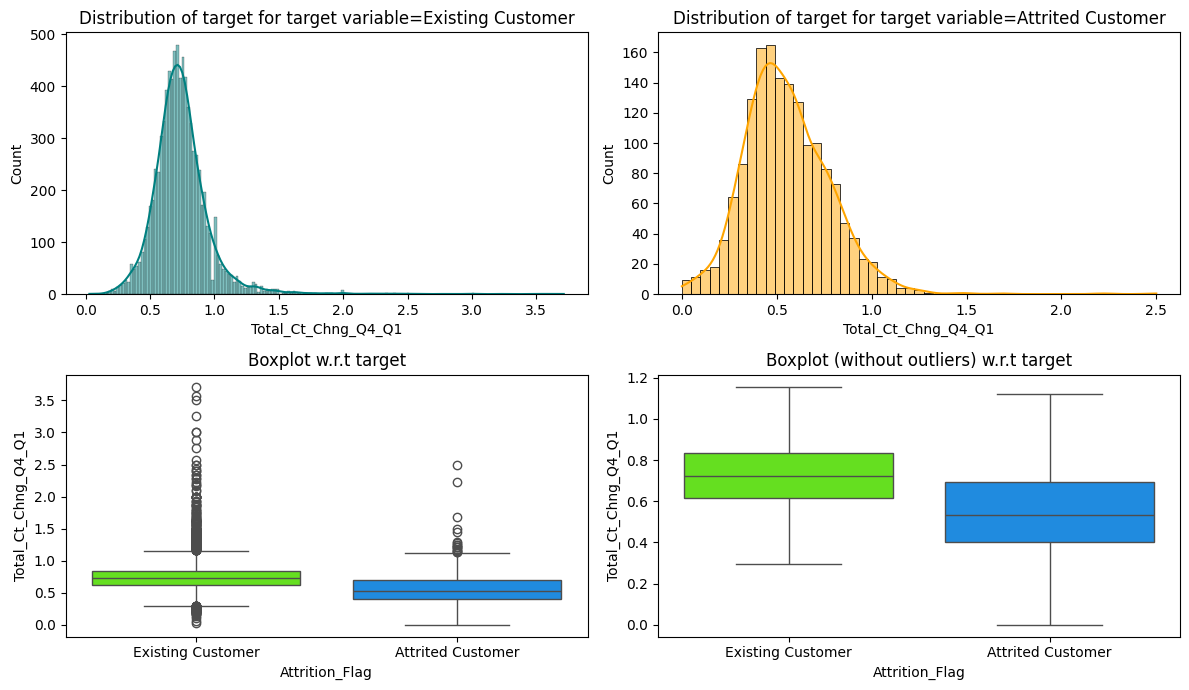

In [68]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

Observation:

1.  This variable have a normal distribution and its it slighly skewed to the right.

2.  The boxplot shows outliers in the variable and the outliers is quite large.

3.  Most of the customers behaved outside the ordinary observations in the variable.

4.  The normalized boxplot without outliers shows that the percentage change is arounf 0.55%

###Heat Map

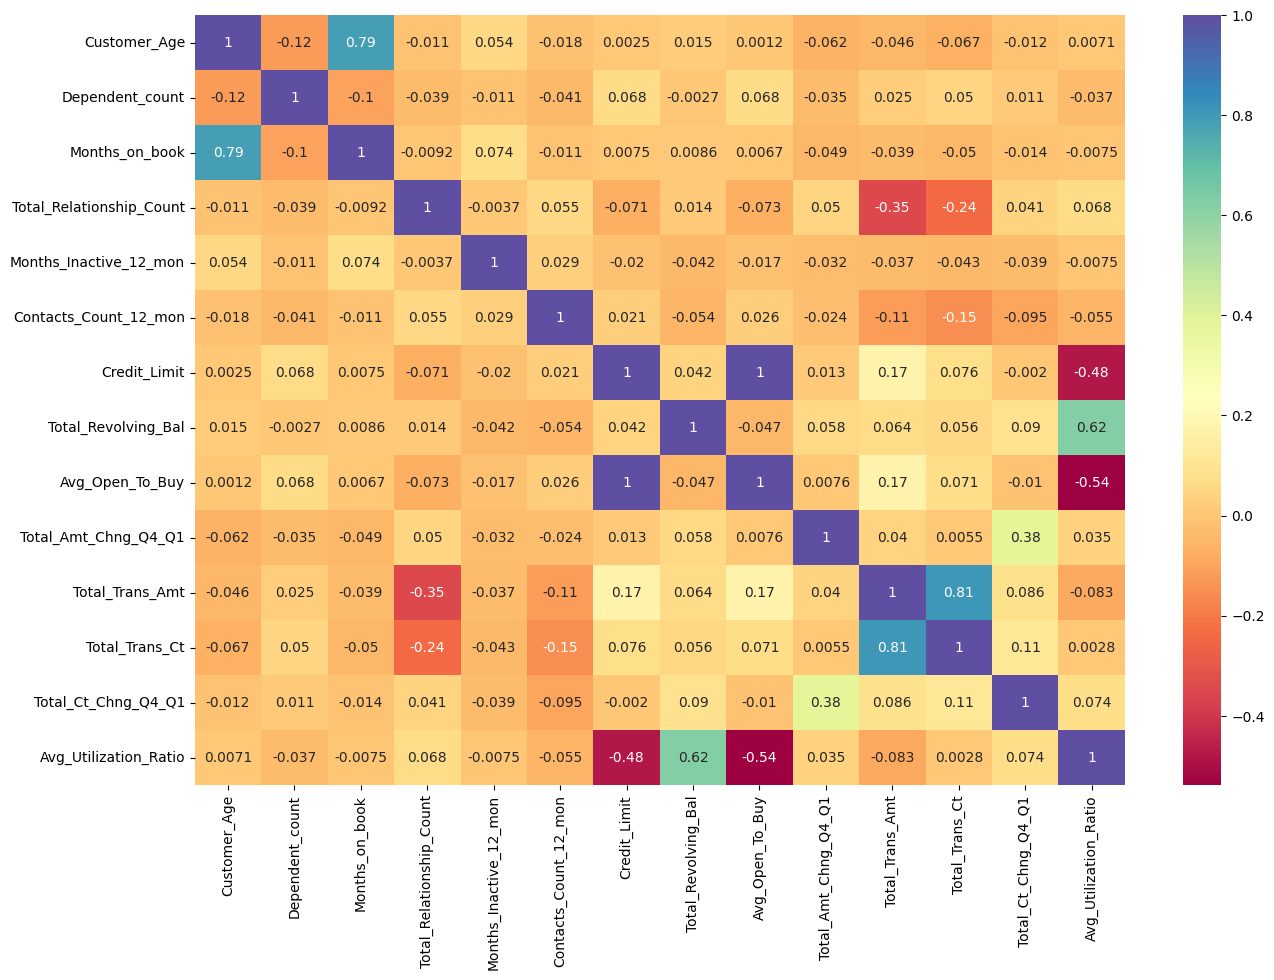

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='Spectral')
plt.show()

###This answer EDA question 6

Observation:
1.   Some of the variable in the distribution have noticiable positive and negative correlations

     *   Positive Correlation variables

     (1) Customer_Age and Months_on_book is positively correlated - 79%

     (2) Avg_Utilization_Ratio and Total_Revolving_Bal - 62%

     (3) Total_Trans_Amt and Total_Trans_Ct - 81% (inter alia)

     *   Negative Correlation variables

     (1) Avg_Utilization_Ratio and Avg_Open_to_Buy - 54%

     (2) Avg_Utilization_Ratio and Credit_Limit - 48%

     (3) Total_Relationship_Count and Total_Trans_Amount 35% (inter alia)

In [71]:
# pairplot using Attrition flag, the dependent variable as emphasis
plt.figure(figsize=(15,7))
sns.pairplot(data, hue="Attrition_Flag")
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

Output hidden; open in https://colab.research.google.com to view.

###This further asnwer EDA question 6

Observation:

There are overlaps i.e. no clear distinction in the distribution of variables for people who have attrited and did not attrit.

1.   No clear distinction in the distribution of variables for people who have attrited and did not attrit as the colorations are widely inter-mingled.
2.   However, the following have lower amounts of attritions
    *   Total Transaction Amount (Last 12 months)
    *   Total Transaction Count (Last 12 months)
    *   Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
    *   Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter

## Data Pre-processing

###Preparing Data for Modeling

In [72]:
# labeling the target variable - Attrition
data.Attrition_Flag = data.Attrition_Flag.replace(
    to_replace={"Attrited Customer": 1, "Existing Customer": 0}
)

data.Attrition_Flag

,Attrition_Flag
0,0
1,0
2,0
3,0
4,0
...,...
10122,0
10123,1
10124,1
10125,1


In [73]:
# cross-checking the above label
data.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7301,0,48,F,4,Graduate,Single,Less than $40K,Blue,40,3,3,3,2300.000,1906,394.000,0.803,4538,71,0.868,0.829
3318,0,49,F,3,Graduate,NaN,Less than $40K,Blue,44,5,2,1,2222.000,694,1528.000,0.903,4372,65,0.711,0.312
9201,1,62,F,0,Uneducated,Single,Less than $40K,Blue,36,6,3,3,5780.000,0,5780.000,0.394,6613,40,0.429,0.000
7118,1,45,M,4,High School,Divorced,Less than $40K,Blue,34,4,2,3,3489.000,2517,972.000,0.721,2684,39,0.560,0.721
8086,0,44,F,3,High School,Single,Less than $40K,Blue,25,2,1,1,2085.000,1528,557.000,0.664,3805,79,0.795,0.733
7368,0,50,F,0,Graduate,Single,Less than $40K,Blue,46,3,2,2,2165.000,1392,773.000,0.734,4194,72,0.946,0.643
8799,0,51,M,2,Graduate,Single,$40K - $60K,Blue,41,1,3,3,3062.000,2058,1004.000,0.622,7289,75,0.705,0.672
1618,0,39,M,4,High School,Married,$60K - $80K,Blue,31,3,1,4,11906.000,2032,9874.000,0.465,1642,39,0.625,0.171
3738,0,39,M,3,Graduate,Married,$60K - $80K,Blue,36,6,3,4,13049.000,943,12106.000,0.686,3944,72,0.674,0.072
5812,0,47,M,5,NaN,Single,$60K - $80K,Blue,32,6,2,3,8823.000,2517,6306.000,0.812,4674,85,0.848,0.285


In [74]:
# Separating target variable and other variables in the dataset
X = data.drop(columns="Attrition_Flag")

# make dependent variable
Y = data["Attrition_Flag"]

# check sample of the columns
X.sample(7)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7629,46,F,3,High School,Single,$40K - $60K,Silver,40,4,3,1,16239.000,1487,14752.000,0.531,3838,48,0.600,0.092
7065,62,M,0,College,NaN,$40K - $60K,Blue,56,2,6,2,3477.000,0,3477.000,0.436,2113,40,0.739,0.000
7033,50,M,1,Doctorate,Single,$80K - $120K,Blue,41,5,4,2,5068.000,991,4077.000,0.736,5173,64,0.600,0.196
1986,47,M,3,High School,Married,$80K - $120K,Blue,36,6,3,3,30210.000,1194,29016.000,0.948,3503,65,0.667,0.040
7725,45,F,3,High School,Married,Less than $40K,Blue,39,1,2,2,1438.300,745,693.300,0.830,5020,83,0.766,0.518
3800,51,F,2,Doctorate,Married,Less than $40K,Platinum,42,3,2,3,15987.000,193,15794.000,0.435,2021,46,0.394,0.012
1899,54,F,2,Graduate,Single,Less than $40K,Blue,48,6,1,4,6610.000,928,5682.000,0.894,3328,69,0.683,0.140


In [75]:
# setting dummy variables for processing
X = pd.get_dummies(data=data,
    columns=[
        "Gender",
        "Education_Level",  # this variables has missing values
        "Marital_Status",  # this variable has missing values
        "Income_Category",
        "Card_Category",
    ],
    drop_first=True,
)

In [76]:
# drop target variable
X = X.drop(columns="Attrition_Flag")

In [77]:
# check sample heads of the data
X.sample(7)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
7251,45,5,37,3,1,1,2467.000,1446,1021.000,0.730,5024,81,0.620,0.586,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False
7094,58,2,36,5,4,3,34516.000,1864,32652.000,0.664,3595,52,0.733,0.054,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
7932,39,3,30,2,3,3,4618.000,0,4618.000,0.717,2476,49,0.750,0.000,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3394,49,3,37,4,3,4,17345.000,545,16800.000,0.905,3523,64,0.829,0.031,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
2660,48,2,29,6,2,3,24446.000,1854,22592.000,0.782,3897,75,0.786,0.076,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
5905,43,2,29,4,1,2,2616.000,1786,830.000,0.876,5219,63,0.750,0.683,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
6608,34,2,13,6,2,2,1798.000,833,965.000,0.882,4551,84,0.787,0.463,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False


In [78]:
# print the percentage of each unique value in the Y variable series
Y.value_counts() / 100

,count
Attrition_Flag,
0,85.000
1,16.270


###Split data into 3 sets i.e. training, validation and test sets respectively:

In [79]:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    random_state=1,
    stratify=y_temp,  # set the weighting feature on
)
print("The Train Set:",X_train.shape)
print("The Validation Set:", X_val.shape)
print("The Testing Set:", X_test.shape)

The Train Set: (6075, 29)
The Validation Set: (2026, 29)
The Testing Set: (2026, 29)


## Missing value imputation




In [80]:
# showing the missing values
data.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [81]:
# view missing data for the affected variables
data[data.Education_Level.isnull()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,0,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
11,0,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.000,1587,7508.000,1.433,1314,26,1.364,0.174
15,0,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.000,972,3262.000,1.707,1348,27,1.700,0.230
17,0,41,M,3,NaN,Married,$80K - $120K,Blue,34,4,4,1,13535.000,1291,12244.000,0.653,1028,21,1.625,0.095
23,0,47,F,4,NaN,Single,Less than $40K,Blue,36,3,3,2,2492.000,1560,932.000,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,0,36,F,3,NaN,Married,$40K - $60K,Blue,22,5,3,3,12958.000,2273,10685.000,0.608,15681,96,0.627,0.175
10094,0,59,M,1,NaN,Single,$60K - $80K,Blue,48,3,1,2,7288.000,0,7288.000,0.640,14873,120,0.714,0.000
10095,0,46,M,3,NaN,Married,$80K - $120K,Blue,33,4,1,3,34516.000,1099,33417.000,0.816,15490,110,0.618,0.032
10118,1,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096


##I will like to use median to impute missing values in Education_Level and  Marital_Status variables.

In [82]:
# Let us now impute the missing values
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
impute = imputer.fit(X_train)

# impute on train, validation set and test set
X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

In [83]:
# check if the missing values have been removed from the training set
np.nan in X_train

False

In [84]:
# let us get column count
len(X_train.T)

29

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

***Model can make wrong predictions as:***

1. Predicting a customer close their credit card account and the customer doesn't - ***Resources Loss***

2. Predicting a customer will not close their credit card account and the customer closed it - ***Opportunity Loss***

***Which case is more important?***

1. Predicting a customer will not close their credit card account and then the customer closed the account. Meaning the company lost potential, existing or on-going customer of a credit card of the bank because that customer will not be targeted by the business team when he should have been targeted.

***How to reduce this loss i.e need to reduce False Negatives?***

The Company would like Recall to be maximized, the greater the Recall, the lower the chances of false negatives.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [85]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [86]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(
    (
        "DecisionTree",
        DecisionTreeClassifier(random_state=1,class_weight={0: 15, 1: 85}),
    )
)

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss"),))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


print("\n" "Training Performance:" "\n")
print("*" * 40)
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("-" * 40)
print("\n" "Validation Performance:" "\n")
print("*" * 40)
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


# loop through all models to get the mean cross validated score
print("-" * 40)
print("\n" "Cross-Validation Performance:" "\n")
print("*" * 40)


for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    model.fit(X_train, y_train)
    print("{}: {}".format(name, cv_result.mean() * 100))



Training Performance:

****************************************
DecisionTree: 1.0
Bagging: 0.9866803278688525
Random forest: 1.0
Xgboost: 1.0
Gradient Boost: 0.8780737704918032
Adaboost: 0.7766393442622951
----------------------------------------

Validation Performance:

****************************************
DecisionTree: 0.803680981595092
Bagging: 0.7975460122699386
Random forest: 0.8190184049079755
Xgboost: 0.8926380368098159
Gradient Boost: 0.8588957055214724
Adaboost: 0.8128834355828221
----------------------------------------

Cross-Validation Performance:

****************************************
DecisionTree: 75.41237113402062
Bagging: 78.99852724594993
Random forest: 75.92047128129602
Xgboost: 86.98506206606356
Gradient Boost: 82.17126025667997
Adaboost: 72.01346517988638


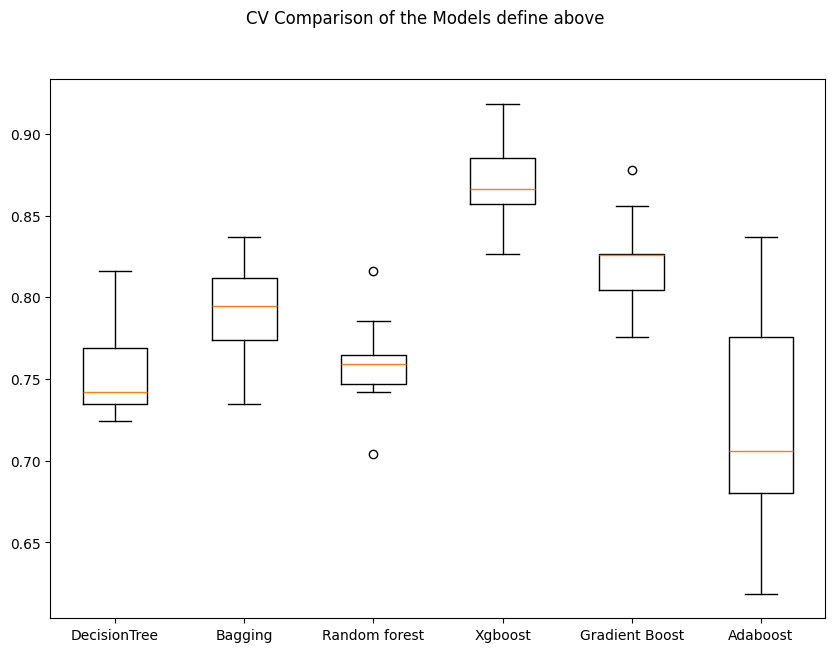

In [87]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("CV Comparison of the Models define above")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Observation on the Comparison Box Plot above:

*   XGBoost is giving the highest cross-validated recall followed by Adaboost and GradientBoost
*   The boxplot shows that the performance of AdaBoost and GradientBoost are consistent
*   The Performance of Adaboost and XGBoost is the same on validation set
*   Tuning Adaboost, GradientBoost and XGBoost is the way to go based on the results and probably the result performance may improve

#Hyperparameter Tuning

###We will tune Adaboost, GradientBoost and XGboost models using GridSearchCV and RandomizedSearchCV. Also, comparison of the performance and time taken by these two methods - Grid search and Randomized search would be taken into consideration. The parameters setting provided in the project notebook would be adopted for the hyperparamets tunings of the models.

###First, let's create two functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

###We will also use the oversampling and undersampling parameters on these 3 chosen models as the case may be.

In [88]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perform = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perform

In [89]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    con_mtx = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / con_mtx.flatten().sum())]
            for item in con_mtx.flatten()
        ]
    ).reshape(2, 2)

    # plot the matrix inside a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(con_mtx, annot=labels, fmt="")
    plt.ylabel("Observed label")
    plt.xlabel("Predicted label")

#Gradient Boost
##GridSearchCV

In [90]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'init': AdaBoostClassifier(random_state=1), 'learning_rate': 0.1, 'max_features': 0.7, 'n_estimators': np.int64(100), 'subsample': 0.9} 
Score: 0.8176138147566719
CPU times: user 4.16 s, sys: 264 ms, total: 4.42 s
Wall time: 6min 6s


In [91]:
# extract best estimator from the model
gbgscv = grid_cv.best_estimator_

In [92]:
# fit the model
gbgscv=gbgscv.fit(X_train, y_train)
print(gbgscv)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=np.int64(100),
                           random_state=1, subsample=0.9)


In [93]:
# Calculating different metrics on train set
print("Training performance:")
gradient_grid_train = model_performance_classification_sklearn(gbgscv, X_train, y_train)
display(gradient_grid_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.974,0.878,0.959,0.917


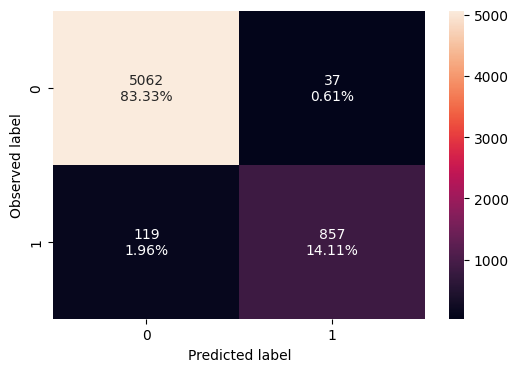

In [94]:
# creating confusion matrix
confusion_matrix_sklearn(gbgscv, X_train, y_train)

In [95]:
# Calculating different metrics on validation set
print("Validation performance:")
gradient_grid_val = model_performance_classification_sklearn(gbgscv, X_val, y_val)
display(gradient_grid_val)

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.969,0.865,0.940,0.901


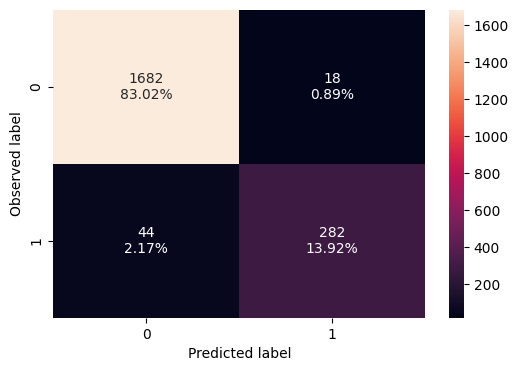

In [96]:
# creating confusion matrix
confusion_matrix_sklearn(gbgscv, X_val, y_val)

Observation:

*   The validation recall is 87%
*   The tuned Gradient Boost model is not overfitting the training data
*   The False Negative rate is slighly above 2%.

#Gradient Boost
##RandomSearchCV

In [97]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=3, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(100), 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8237659273242096:
CPU times: user 2.57 s, sys: 99.4 ms, total: 2.67 s
Wall time: 1min 38s


In [98]:
# extract best estimator from the model
gbrs = randomized_cv.best_estimator_

In [99]:
# Fit the model on training data
gbrs=gbrs.fit(X_train, y_train)
print(gbrs)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, n_estimators=np.int64(100),
                           random_state=1, subsample=0.9)


In [100]:
# Calculating different metrics on train set
print("Training performance:")
gradient_random_train = model_performance_classification_sklearn(gbrs, X_train, y_train)
display(gradient_random_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.972,0.870,0.953,0.909


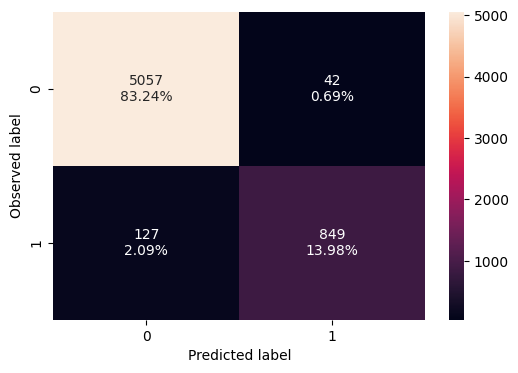

In [101]:
# creating confusion matrix
confusion_matrix_sklearn(gbrs, X_train, y_train)

In [102]:
# Calculating different metrics on validation set
print("Validation performance:")
gradient_random_val = model_performance_classification_sklearn(gbrs, X_val, y_val)
display(gradient_random_val)

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.967,0.853,0.939,0.894


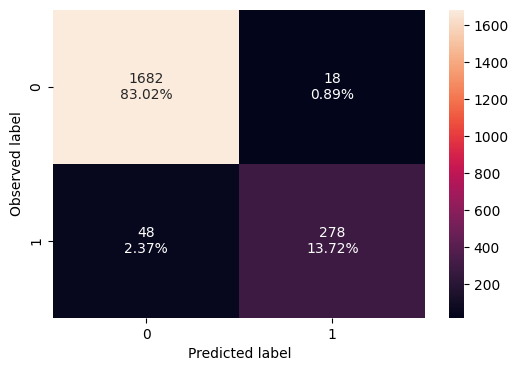

In [103]:
# creating confusion matrix
confusion_matrix_sklearn(gbrs, X_val, y_val)

Observation:

*   The validation recall is lower than the training recall and lower than what we got before under the GridSearch version.
*   The RandomSearchCV tuned model is not overfitting the training data.
*   The False Negatives is 2.32% but higher than the GridSearchCV version.
*   The time of computation was improved compared to GridSearchCV method.

#Adaboost
##GridSearchCV

In [106]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=3, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.1, 'n_estimators': np.int64(100)} 
Score: 0.782790624508416
CPU times: user 2.6 s, sys: 51 ms, total: 2.65 s
Wall time: 1min


In [107]:
# get best model
adb_tuned1 = grid_cv.best_estimator_

In [108]:
# fit the model
adb_tuned1=adb_tuned1.fit(X_train, y_train)
print(adb_tuned1)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=np.int64(100),
                   random_state=1)


In [109]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.964,0.832,0.934,0.880


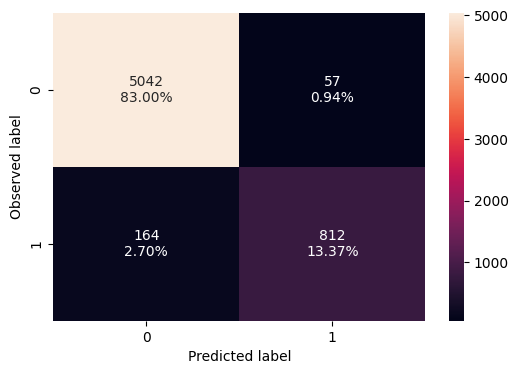

In [110]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_train, y_train)

In [111]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.964,0.837,0.932,0.882


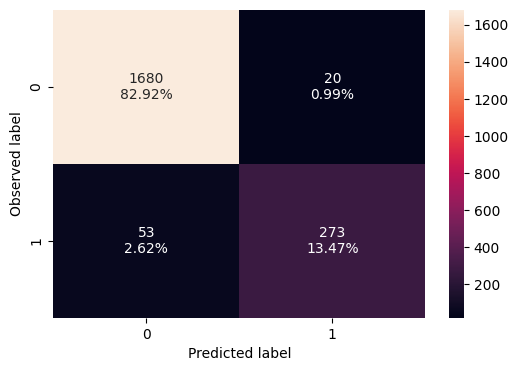

In [112]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

Observation:

*   The validation recall is ok at about 88%, its better than what we see in the GradientBoost model's GridSearchCV.
*   The model is good at identifying potential customers who would remain customer and also showed a lower False Negatives when comapred to the FNs identified in the GradientBoost model
*   The tuned Adaboost model is not overfitting the training data.

#AdaBoost
##RandomSearchCV

In [115]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=3, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(100), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.782790624508416:
CPU times: user 2.66 s, sys: 41.1 ms, total: 2.7 s
Wall time: 1min 1s


In [116]:
# building model with best parameters
adb_tuned2 = randomized_cv.best_estimator_
# Fit the model on training data
adb_tuned2=adb_tuned2.fit(X_train, y_train)
print(adb_tuned2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=np.int64(100),
                   random_state=1)


In [117]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.964,0.832,0.934,0.880


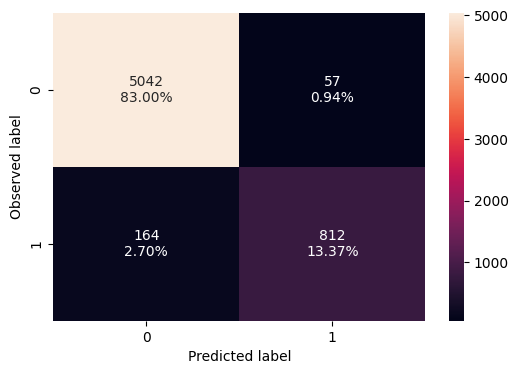

In [118]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_train, y_train)

In [119]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.964,0.837,0.932,0.882


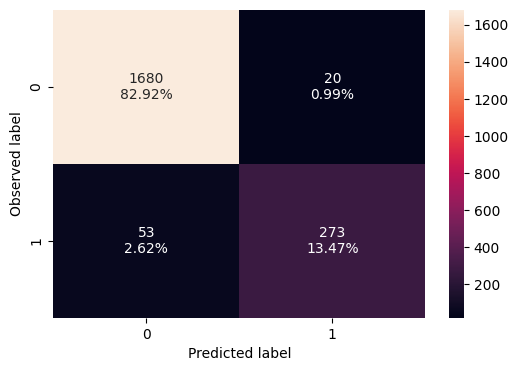

In [120]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

Observation:

*   The model is not overfitting.
*   The model is showed less False Negatives than observed in the GradientBoost models (GridSearch and RandomSearch CVs).
*   Model in validation has a almost similar score to GradientBoosting model with 87%.

#XGBoost
##GridSearchCV

In [121]:
%%time

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=3, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters are {'gamma': 3, 'learning_rate': 0.05, 'n_estimators': np.int64(100), 'scale_pos_weight': 5, 'subsample': 0.7} with CV score=0.9180116407110273:
CPU times: user 2.16 s, sys: 83.4 ms, total: 2.25 s
Wall time: 59.7 s


In [122]:
# building model with best parameters
xgb_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(100), n_jobs=None,
              num_parallel_tree=None, ...)

In [123]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.980,0.998,0.890,0.941


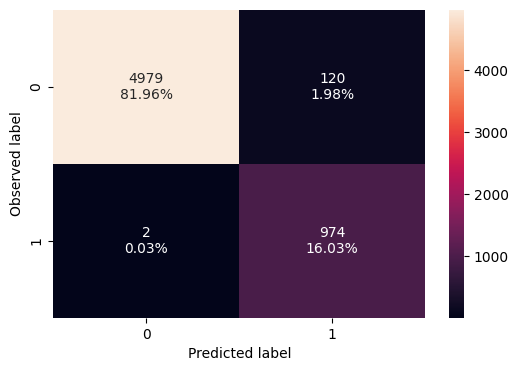

In [124]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_train, y_train)

In [125]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.959,0.942,0.825,0.880


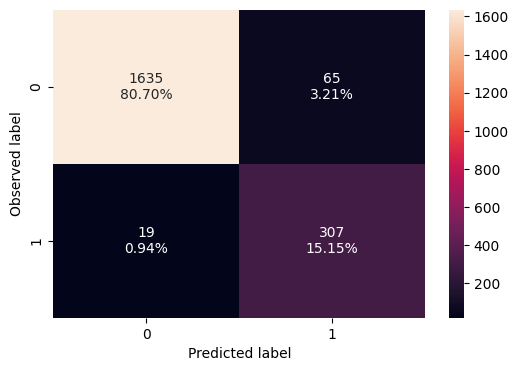

In [126]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

Observation:

*   The validation recall is higher than previous models at 94% but accuracy is also good at 96%.
*   There is overfitting of the data in the model.
*   The False Negatives is the lowest so far among all the models at 0.94%.

#XGBoost
##RandomSearchCV

In [127]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=3, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': np.int64(75), 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9149347176341042:
CPU times: user 1.09 s, sys: 41.6 ms, total: 1.13 s
Wall time: 26.1 s


In [128]:
# building model with best parameters
xgb_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(75), n_jobs=None,
              num_parallel_tree=None, ...)

In [129]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.974,0.995,0.866,0.926


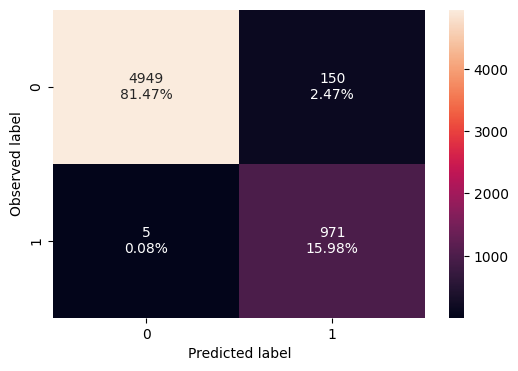

In [130]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_train, y_train)

In [131]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.957,0.939,0.820,0.876


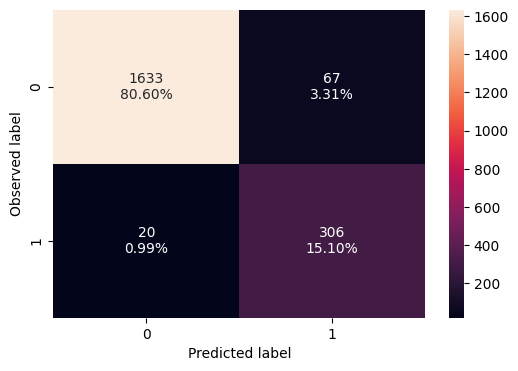

In [132]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

Observation:

*   The the training and validation sets are not overfitting.
*   The False Negatives is doing okay at 0.99% but higher than the GridSearchCV tuning method by 0.01%.
*   The Recall scores have increased from the GridSearch method.

# Model Building with Oversampled data


##Training Set

In [133]:
# print counts of target variable before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

# fit and resample the training data
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# prit data size after the oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 976
Before OverSampling, counts of label '0': 5099 

After OverSampling, counts of label '1': 5099
After OverSampling, counts of label '0': 5099 

After OverSampling, the shape of train_X: (10198, 29)
After OverSampling, the shape of train_y: (10198,) 



##Validation Set

In [134]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_val == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_val == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_val_over, y_val_over = sm.fit_resample(X_val, y_val)


print("After OverSampling, counts of label '1': {}".format(sum(y_val_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_val_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_val_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_val_over.shape))

Before OverSampling, counts of label '1': 326
Before OverSampling, counts of label '0': 1700 

After OverSampling, counts of label '1': 1700
After OverSampling, counts of label '0': 1700 

After OverSampling, the shape of train_X: (3400, 29)
After OverSampling, the shape of train_y: (3400,) 



##GradientBoost with oversampled Data

In [135]:
# fit the model
model = GradientBoostingClassifier(random_state=1)
gbost = model.fit(X_train_over, y_train_over)

In [136]:
# Calculating different metrics on train set
gradient_over = model_performance_classification_sklearn(
    gbost, X_train_over, y_train_over
)
print("Training performance:")
gradient_over

Training performance:


,Accuracy,Recall,Precision,F1
0,0.981,0.981,0.981,0.981


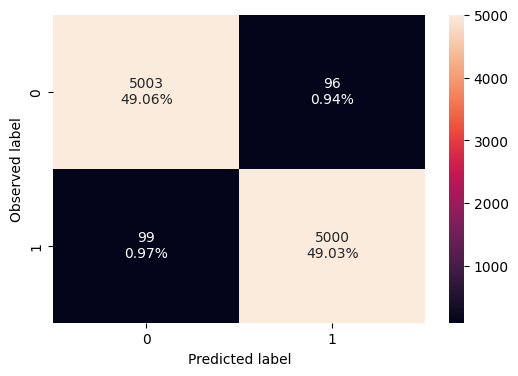

In [137]:
# creating confusion matrix
confusion_matrix_sklearn(gbost, X_train_over, y_train_over)

In [138]:
# fit the model
model = GradientBoostingClassifier(random_state=1)
gbosv = model.fit(X_val_over, y_val_over)

In [139]:
# Calculating different metrics on train set
gradient_over_val = model_performance_classification_sklearn(
    gbosv, X_val_over, y_val_over
)
print("Validation performance:")
gradient_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.992,0.994,0.991,0.992


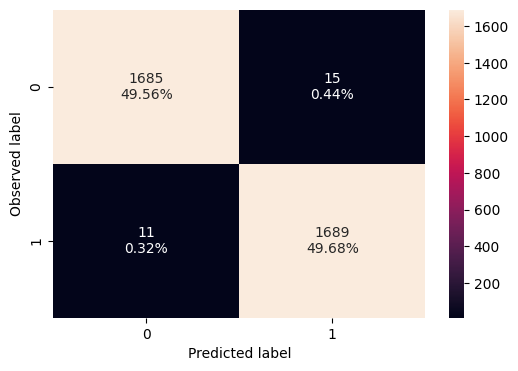

In [140]:
# creating confusion matrix
confusion_matrix_sklearn(gbosv, X_val_over, y_val_over)

###**AdaBoost** with oversampled data

In [141]:
# fit the model
model = AdaBoostClassifier(random_state=1)
adost = model.fit(X_train_over, y_train_over)

In [142]:
# Calculating different metrics on train set
Adaboost_over = model_performance_classification_sklearn(
    adost, X_train_over, y_train_over
)
print("Training performance:")
Adaboost_over

Training performance:


,Accuracy,Recall,Precision,F1
0,0.953,0.960,0.947,0.954


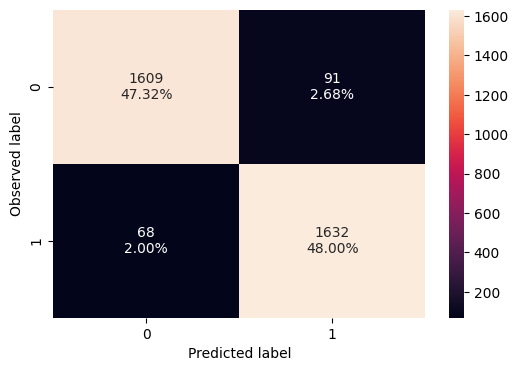

In [143]:
# creating confusion matrix
confusion_matrix_sklearn(adost, X_val_over, y_val_over)

In [144]:
# fit the model
model = AdaBoostClassifier(random_state=1)
adosv = model.fit(X_val_over, y_val_over)

In [145]:
# Calculating different metrics on train set
Adaboost_over_val = model_performance_classification_sklearn(
    adosv, X_val_over, y_val_over
)
print("Validation performance:")
Adaboost_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.957,0.974,0.942,0.958


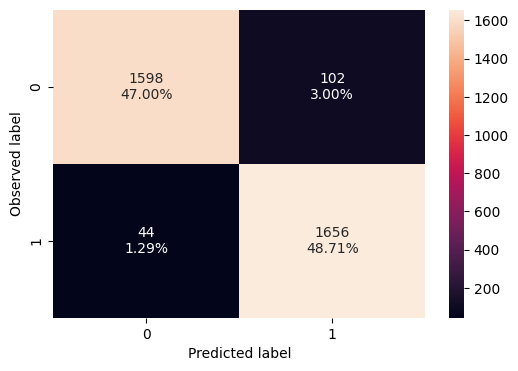

In [146]:
# creating confusion matrix
confusion_matrix_sklearn(adosv, X_val_over, y_val_over)

###XGBoost with oversampled data

In [147]:
# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")
xgbost = model.fit(X_train_over, y_train_over)

In [148]:
# Calculating different metrics on train set
xgboost_over = model_performance_classification_sklearn(
    xgbost, X_train_over, y_train_over
)
print("Training performance:")
xgboost_over

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


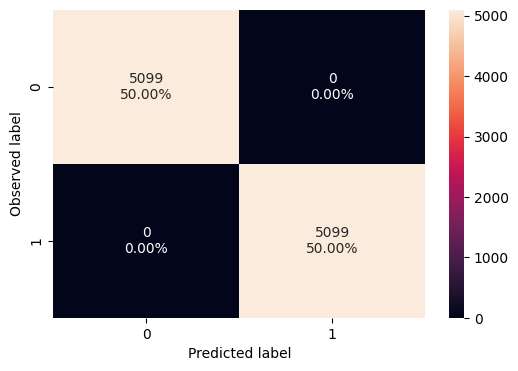

In [149]:
# creating confusion matrix
confusion_matrix_sklearn(xgbost, X_train_over, y_train_over)

In [150]:
# fit the model
model = XGBClassifier(random_state=1, eval_metric="logloss")
xgbosv = model.fit(X_val_over, y_val_over)

In [151]:
# Calculating different metrics on train set
xgboost_over_val = model_performance_classification_sklearn(
    xgbosv, X_val_over, y_val_over
)
print("Validation performance:")
xgboost_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


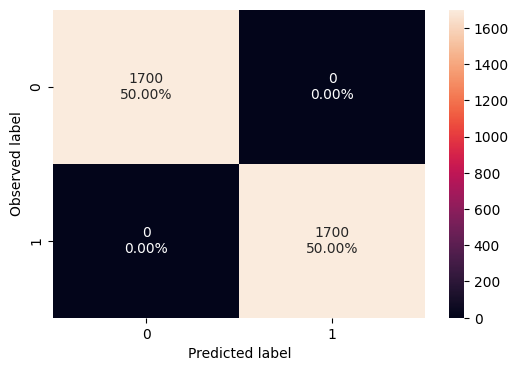

In [152]:
# creating confusion matrix
confusion_matrix_sklearn(xgbosv, X_val_over, y_val_over)

# Model Building with Undersampled data

##Training set

In [153]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)

# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [154]:
display(X_train.shape)
display(X_under.shape)

(6075, 29)

(2928, 29)

## Validation set

In [155]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)

# fit and apply the transform
X_under_val, y_under_val = undersample.fit_resample(X_val, y_val)

In [156]:
display(X_val.shape)
display(X_under_val.shape)

(2026, 29)

(978, 29)

##GradientBoost with undersampled Data

In [157]:
# fit the model
model = GradientBoostingClassifier(random_state=1)
gbust = model.fit(X_under, y_under)

In [158]:
# Calculating different metrics on train set
gradient_under = model_performance_classification_sklearn(gbust, X_under, y_under)
print("Training performance:")
gradient_under

Training performance:


,Accuracy,Recall,Precision,F1
0,0.978,0.960,0.975,0.967


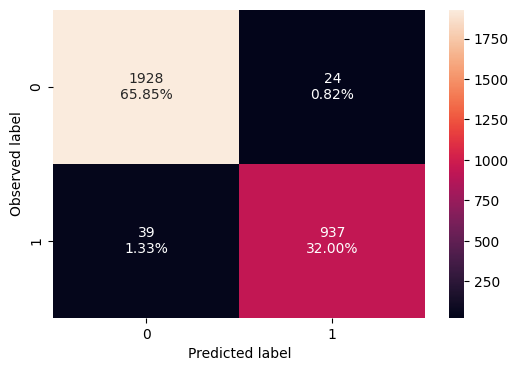

In [159]:
# creating confusion matrix
confusion_matrix_sklearn(gbust, X_under, y_under)

In [160]:
# fit the model
model = GradientBoostingClassifier(random_state=1)
gbusv = model.fit(X_under_val, y_under_val)

In [161]:
# Calculating different metrics on train set
gradient_under_val = model_performance_classification_sklearn(
    gbusv, X_under_val, y_under_val
)
print("Validation performance:")
gradient_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.993,0.991,0.988,0.989


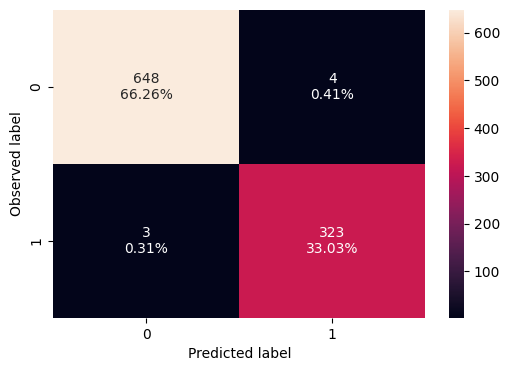

In [162]:
# creating confusion matrix
confusion_matrix_sklearn(gbusv, X_under_val, y_under_val)

##AdaBoost with undersampled data

In [163]:
# fit the model
model = AdaBoostClassifier(random_state=1)
adust = model.fit(X_under, y_under)

In [164]:
# Calculating different metrics on train set
Adaboost_under = model_performance_classification_sklearn(adust, X_under, y_under)
print("Training performance:")
Adaboost_under

Training performance:


,Accuracy,Recall,Precision,F1
0,0.929,0.876,0.908,0.892


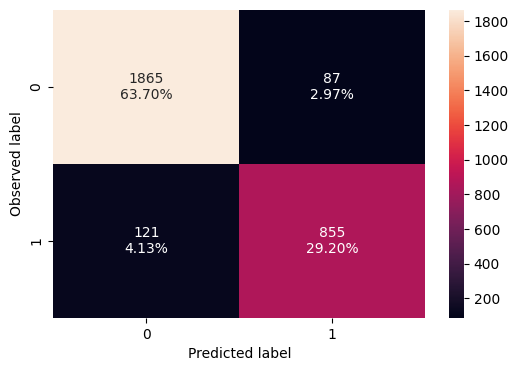

In [165]:
# creating confusion matrix
confusion_matrix_sklearn(adust, X_under, y_under)

In [166]:
# fit the model
model = AdaBoostClassifier(random_state=1)
adusv = model.fit(X_under_val, y_under_val)

In [167]:
# Calculating different metrics on train set
Adaboost_under_val = model_performance_classification_sklearn(
    adusv, X_under_val, y_under_val
)
print("Validation performance:")
Adaboost_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.946,0.890,0.945,0.916


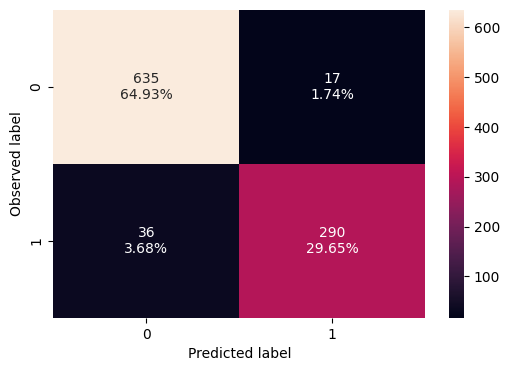

In [168]:
# creating confusion matrix
confusion_matrix_sklearn(adusv, X_under_val, y_under_val)

##XGBoost with undersampled Data

In [169]:
# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")
xgbust = model.fit(X_under, y_under)

In [170]:
display(xgbust)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [171]:
# Calculating different metrics on train set
xgboost_under = model_performance_classification_sklearn(xgbust, X_under, y_under)
print("Training performance:")
xgboost_under

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


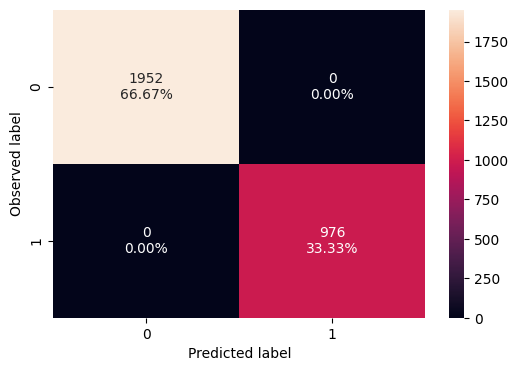

In [172]:
# creating confusion matrix
confusion_matrix_sklearn(xgbust, X_under, y_under)

In [173]:
# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")
xgbusv = model.fit(X_under_val, y_under_val)

In [174]:
# Calculating different metrics on train set
xgboost_under_val = model_performance_classification_sklearn(
    xgbusv, X_under_val, y_under_val
)
print("Validation performance:")
xgboost_under_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


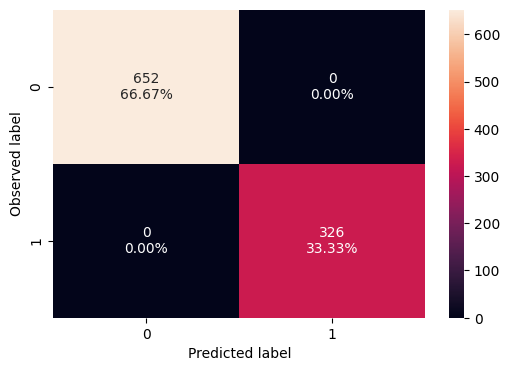

In [175]:
# creating confusion matrix
confusion_matrix_sklearn(xgbusv, X_under_val, y_under_val)

## Model Comparison and Final Model Selection

In [176]:
# concatenate the dataframes
models_train_comp_df = pd.concat(
    [
        gradient_grid_train.T,
        gradient_grid_val.T,
        gradient_random_train.T,
        gradient_random_val.T,
        gradient_over.T,
        gradient_over_val.T,
        gradient_under.T,
        gradient_under_val.T,
        Adaboost_grid_train.T,
        Adaboost_grid_val.T,
        Adaboost_random_train.T,
        Adaboost_random_val.T,
        Adaboost_over.T,
        Adaboost_over_val.T,
        Adaboost_under.T,
        Adaboost_under_val.T,
        xgboost_grid_train.T,
        xgboost_grid_val.T,
        xgboost_random_train.T,
        xgboost_random_val.T,
        xgboost_over.T,
        xgboost_over_val.T,
        xgboost_under.T,
        xgboost_under_val.T,
    ],axis=1
)
# give the columns headers
models_train_comp_df.columns = [
    "GradientBoost Tuned with GridSearchCV Train Set",
    "GradientBoost Tuned with GridSearchCV Validatn Set",
    "GradientBoost Tuned with RandomSearchCV Train Set",
    "GradientBoost Tuned with RandomSearchCV Validatn Set",
    "GradientBoost Tuned with Oversampled Train Set",
    "GradientBoost Tuned with Oversampled Validatn Set",
    "GradientBoost Tuned with Undersampled Train Set",
    "GradientBoost Tuned with Undersampled Validatn Set",
    "AdaBoost Tuned with GridSearchCV Train Set",
    "AdaBoost Tuned with GridSearchCV Validatn Set",
    "AdaBoost Tuned with RandomSearchCV Train Set",
    "AdaBoost Tuned with RandomSearchCV Validatn Set",
    "AdaBoost Tuned with Oversampled Train Set",
    "AdaBoost Tuned with Oversampled Validatn Set",
    "AdaBoost Tuned with Undersampled Train Set",
    "AdaBoost Tuned with Undersampled Validatn Set",
    "Xgboost Tuned with GridSearchCV Train Set",
    "Xgboost Tuned with GridSearchCV Validatn Set",
    "Xgboost Tuned with RandomSearchCV Train Set",
    "Xgboost Tuned with RandomSearchCV Validatn Set",
    "Xgboost Tuned with Oversampled Train Set",
    "Xgboost Tuned with Oversampled Validatn Set",
    "Xgboost Tuned with Undersampled Train Set",
    "Xgboost Tuned with Undersampled Validatn Set",
]

# print the dataframe
print("Training & Validation performance comparison:")
print("*" * 45)
models_train_comp_df

Training & Validation performance comparison:
*********************************************


,GradientBoost Tuned with GridSearchCV Train Set,GradientBoost Tuned with GridSearchCV Validatn Set,GradientBoost Tuned with RandomSearchCV Train Set,GradientBoost Tuned with RandomSearchCV Validatn Set,GradientBoost Tuned with Oversampled Train Set,GradientBoost Tuned with Oversampled Validatn Set,GradientBoost Tuned with Undersampled Train Set,GradientBoost Tuned with Undersampled Validatn Set,AdaBoost Tuned with GridSearchCV Train Set,AdaBoost Tuned with GridSearchCV Validatn Set,AdaBoost Tuned with RandomSearchCV Train Set,AdaBoost Tuned with RandomSearchCV Validatn Set,AdaBoost Tuned with Oversampled Train Set,AdaBoost Tuned with Oversampled Validatn Set,AdaBoost Tuned with Undersampled Train Set,AdaBoost Tuned with Undersampled Validatn Set,Xgboost Tuned with GridSearchCV Train Set,Xgboost Tuned with GridSearchCV Validatn Set,Xgboost Tuned with RandomSearchCV Train Set,Xgboost Tuned with RandomSearchCV Validatn Set,Xgboost Tuned with Oversampled Train Set,Xgboost Tuned with Oversampled Validatn Set,Xgboost Tuned with Undersampled Train Set,Xgboost Tuned with Undersampled Validatn Set
Accuracy,0.974,0.969,0.972,0.967,0.981,0.992,0.978,0.993,0.964,0.964,0.964,0.964,0.953,0.957,0.929,0.946,0.980,0.959,0.974,0.957,1.000,1.000,1.000,1.000
Recall,0.878,0.865,0.870,0.853,0.981,0.994,0.960,0.991,0.832,0.837,0.832,0.837,0.960,0.974,0.876,0.890,0.998,0.942,0.995,0.939,1.000,1.000,1.000,1.000
Precision,0.959,0.940,0.953,0.939,0.981,0.991,0.975,0.988,0.934,0.932,0.934,0.932,0.947,0.942,0.908,0.945,0.890,0.825,0.866,0.820,1.000,1.000,1.000,1.000
F1,0.917,0.901,0.909,0.894,0.981,0.992,0.967,0.989,0.880,0.882,0.880,0.882,0.954,0.958,0.892,0.916,0.941,0.880,0.926,0.876,1.000,1.000,1.000,1.000


In [177]:
# create a dataframe from the confusion matrix false negative scores
defaultdict = {
    "Gradient Boost Tuned with Gridsearch Training Set": 123,
    "Gradient Boost Tuned with Gridsearch Validation Set": 43,
    "Gradient Boost Tuned with Randomsearch Training Set": 131,
    "Gradient Boost Tuned with Randomsearch Validation Set": 47,
    "Gradient Boost Tuned with Oversampled Training Set": 99,
    "Gradient Boost Tuned with Oversampled Validation Set": 11,
    "Gradient Boost Tuned with Undersampled Training Set": 41,
    "Gradient Boost Tuned with Undersampled Validation Set": 3,
    "AdaBoost Tuned with Gridsearch Training Set": 72,
    "AdaBoost Tuned with Gridsearch Validation Set": 41,
    "AdaBoost Tuned with Randomsearch Training Set": 72,
    "AdaBoost Tuned with Randomsearch Validation Set": 41,
    "AdaBoost Tuned with Oversampled Training Set": 57,
    "AdaBoost Tuned with Oversampled Validation Set": 41,
    "AdaBoost Tuned with Undersampled Training Set": 78,
    "AdaBoost Tuned with Undersampled Validation Set": 13,
    "Xgboost Tuned with Gridsearch Training Set": 2,
    "Xgboost Tuned with Gridsearch Validation Set": 19,
    "Xgboost Tuned with RandomSearch Training Set": 5,
    "Xgboost Tuned with RandomSearch Validation Set": 20,
    "Xgboost Tuned with Oversampled Training Set": 0,
    "Xgboost Tuned with Oversampled Validation Set": 0,
    "Xgboost Tuned with Undersampled Training Set": 0,
    "Xgboost Tuned with Undersampled Validation Set": 0,
}
false_negatives_df_train = pd.DataFrame.from_dict(
    defaultdict, orient="index", columns=["False Negatives"]
)
display(false_negatives_df_train.sort_values("False Negatives"))

,False Negatives
Xgboost Tuned with Oversampled Training Set,0
Xgboost Tuned with Oversampled Validation Set,0
Xgboost Tuned with Undersampled Training Set,0
Xgboost Tuned with Undersampled Validation Set,0
Xgboost Tuned with Gridsearch Training Set,2
Gradient Boost Tuned with Undersampled Validation Set,3
Xgboost Tuned with RandomSearch Training Set,5
Gradient Boost Tuned with Oversampled Validation Set,11
AdaBoost Tuned with Undersampled Validation Set,13
Xgboost Tuned with Gridsearch Validation Set,19


In [178]:
# create a dataframe from the confusion matrix RECALL scores
defaultdict = {
    "Gradient Boost Tuned with Gridsearch Training Set": 0.874,
    "Gradient Boost Tuned with Gridsearch Validation Set": 0.868,
    "Gradient Boost Tuned with Randomsearch Training Set": 0.866,
    "Gradient Boost Tuned with Randomsearch Validation Set": 0.856,
    "Gradient Boost Tuned with Oversampled Training Set": 0.981,
    "Gradient Boost Tuned with Oversampled Validation Set": 0.994,
    "Gradient Boost Tuned with Undersampled Training Set": 0.956,
    "Gradient Boost Tuned with Undersampled Validation Set": 0.968,
    "AdaBoost Tuned with Gridsearch Training Set": 0.926,
    "AdaBoost Tuned with Gridsearch Validation Set": 0.874,
    "AdaBoost Tuned with Randomsearch Training Set": 0.926,
    "AdaBoost Tuned with Randomsearch Validation Set": 0.874,
    "AdaBoost Tuned with Oversampled Training Set": 0.969,
    "AdaBoost Tuned with Oversampled Validation Set": 0.976,
    "AdaBoost Tuned with Undersampled Training Set": 0.910,
    "AdaBoost Tuned with Undersampled Validation Set": 0.966,
    "Xgboost Tuned with Gridsearch Training Set": 0.998,
    "Xgboost Tuned with Gridsearch Validation Set": 0.942,
    "Xgboost Tuned with RandomSearch Training Set": 0.995,
    "Xgboost Tuned with RandomSearch Validation Set": 0.935,
    "Xgboost Tuned with Oversampled Training Set": 1.000,
    "Xgboost Tuned with Oversampled Validation Set": 1.000,
    "Xgboost Tuned with Undersampled Training Set": 1.000,
    "Xgboost Tuned with Undersampled Validation Set": 1.000,
}
false_negatives_df_train = pd.DataFrame.from_dict(
    defaultdict, orient="index", columns=["Recall"]
)
display(false_negatives_df_train.sort_values("Recall"))

,Recall
Gradient Boost Tuned with Randomsearch Validation Set,0.856
Gradient Boost Tuned with Randomsearch Training Set,0.866
Gradient Boost Tuned with Gridsearch Validation Set,0.868
Gradient Boost Tuned with Gridsearch Training Set,0.874
AdaBoost Tuned with Randomsearch Validation Set,0.874
AdaBoost Tuned with Gridsearch Validation Set,0.874
AdaBoost Tuned with Undersampled Training Set,0.910
AdaBoost Tuned with Gridsearch Training Set,0.926
AdaBoost Tuned with Randomsearch Training Set,0.926
Xgboost Tuned with RandomSearch Validation Set,0.935


Best Model Choice

The most suitable model evaluation metrics, in this case, are recall, using recall because it needs to take into account the percentage of False Negative (FN) that must be minimized.

The best model obtained is ***XGBoost Tuned with RandomSearch Training Set (xgb_tuned2) with recall scores of 0.995 and FN of 5 in training data, respectively.***

## Test set final performance

Choose the model that has Recall & Precision > 0.95 and find test accuracy > 0.70 on test set.

In [179]:
# Calculating different metrics on the test set
gbsov_test = model_performance_classification_sklearn(gbosv, X_test, y_test)
print("GradientBoost Tuned with Oversampled Validation Set: Test performance:")
gbsov_test

GradientBoost Tuned with Oversampled Validation Set: Test performance:


,Accuracy,Recall,Precision,F1
0,0.954,0.874,0.843,0.858


In [180]:
# Calculating different metrics on the test set
adaboost_test = model_performance_classification_sklearn(adb_tuned2, X_test, y_test)
print("AdaBoost Tuned with Random search Training Set: Test performance:")
adaboost_test

AdaBoost Tuned with Random search Training Set: Test performance:


,Accuracy,Recall,Precision,F1
0,0.964,0.852,0.917,0.884


In [181]:
# Calculating different metrics on the test set
gbusv_test = model_performance_classification_sklearn(gbusv, X_test, y_test)
print("GradientBoost Tuned with Undersampled Validation Set: Test performance:")
gbusv_test

GradientBoost Tuned with Undersampled Validation Set: Test performance:


,Accuracy,Recall,Precision,F1
0,0.952,0.917,0.810,0.860


None of these models performed above 95% on Recall and Precision and above 70% in accuracy. Let's go back to the comparison frame and try different models.

In [182]:
# Calculating different metrics on the test set
xgboostrv_test = model_performance_classification_sklearn(xgb_tuned2, X_test, y_test)
print("XGBoost with XGBoost Random Sampling Data: Test performance:")
xgboostrv_test

XGBoost with XGBoost Random Sampling Data: Test performance:


,Accuracy,Recall,Precision,F1
0,0.956,0.951,0.809,0.874


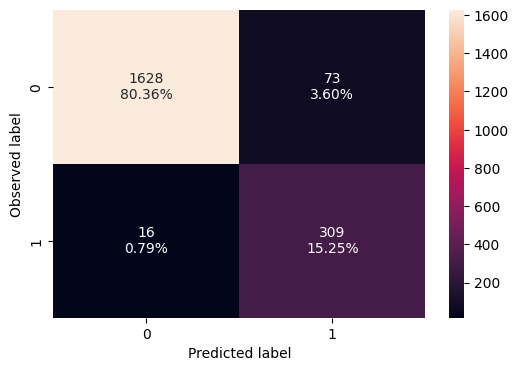

In [183]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_test, y_test)

Observation:

*   The XGBoost with Random SamplingCV Validation Data is giving us our 3 success measures.
*   The performance on test data is generally lower than validation or training sets of the model.
*   This model would give us False Negatives of less than 1%.


This model is giving us the accuracy, recall and precision we need, along with the low false negative error rate, so that we can use it in production

***Features of Importance***

Let's extract the feature importance ranking from this model so that we can where to focus our analytical efforts when examining target variable i.e. credit card churners

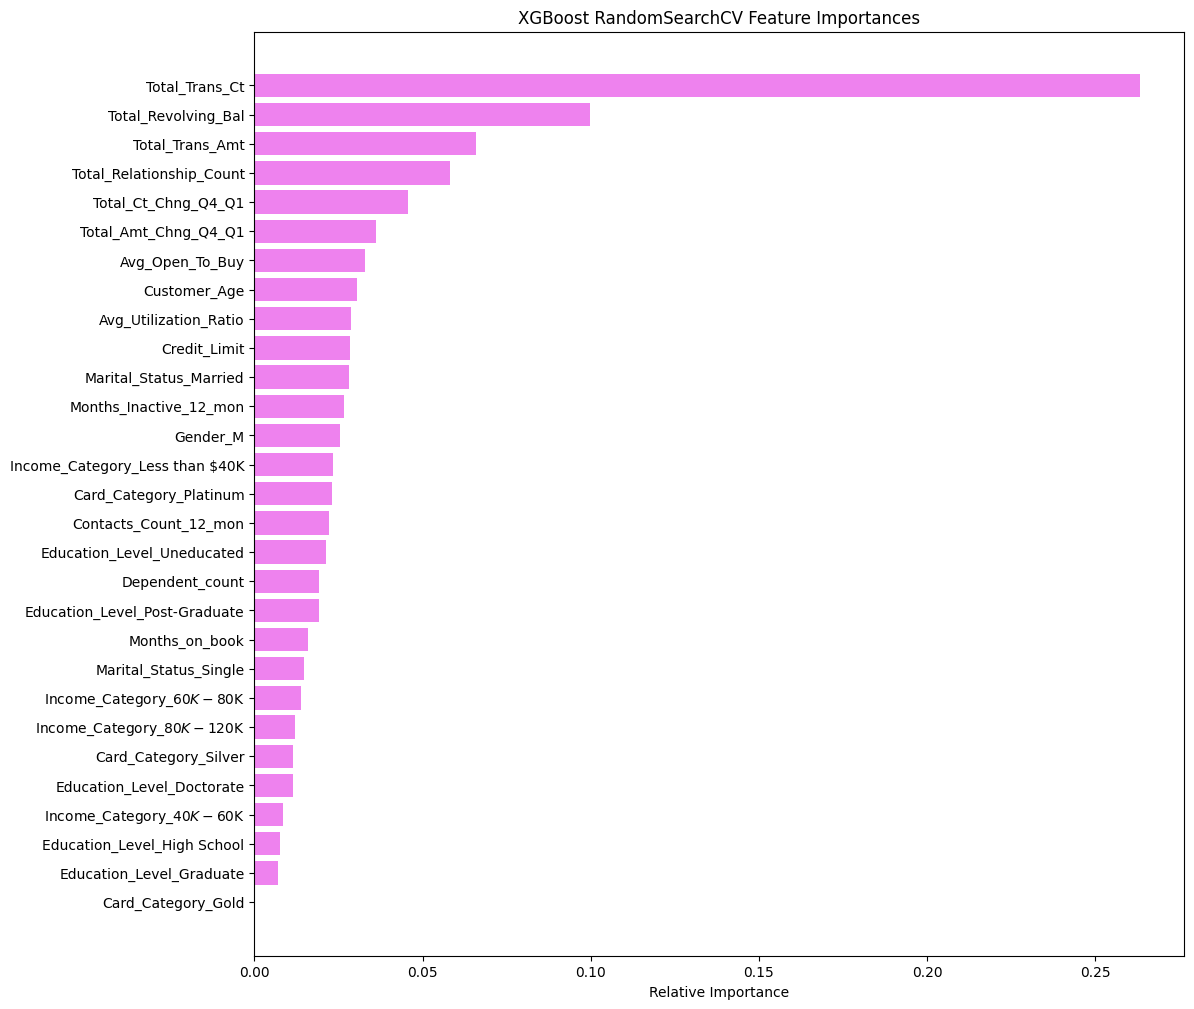

In [184]:
# get list of features from dmodel
feature_names = X.columns
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

# plot the features
plt.figure(figsize=(12, 12))
plt.title("XGBoost RandomSearchCV Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:

The most important features to understand customer credit card churn, are
1.  Total Transaction Count
2.  Total Transaction Amount
3.  Total Revolving Balance
4.  Total Amount Change Q4 to Q1
5.  Total Count Change Q4 to Q1
6.  Total Relationship Count

All of these features are negatively correlated with the Attrition Flag, meaning, the lower the values of these features, the higher the chances of a customer to attrite


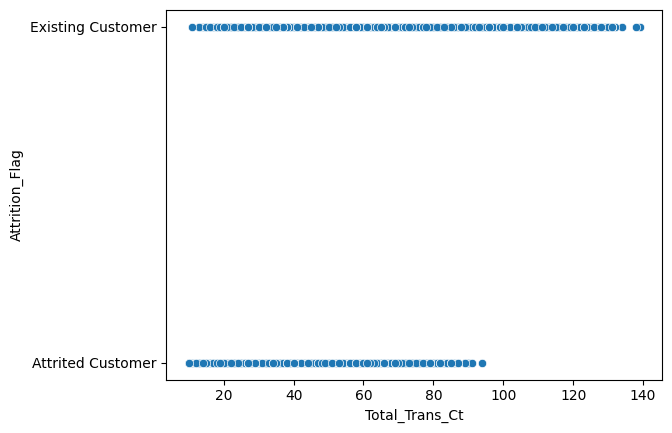

In [185]:
# create a scatterplot
sns.scatterplot(x=data.Total_Trans_Ct, y=card.Attrition_Flag)
plt.show()

<Axes: xlabel='Total_Revolving_Bal', ylabel='Attrition_Flag'>

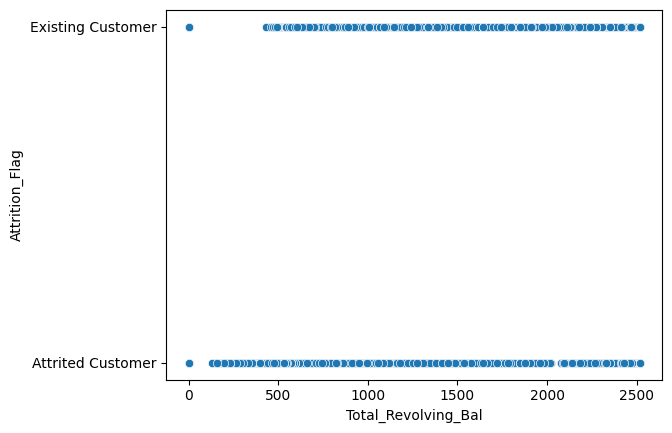

In [186]:
# create a scatterplot
sns.scatterplot(x=data.Total_Revolving_Bal, y=card.Attrition_Flag)

In [187]:
# crosstabs
pd.crosstab(index=data["Attrition_Flag"], columns=data["Total_Relationship_Count"])

Total_Relationship_Count,1,2,3,4,5,6
Attrition_Flag,,,,,,
0,677,897,1905,1687,1664,1670
1,233,346,400,225,227,196


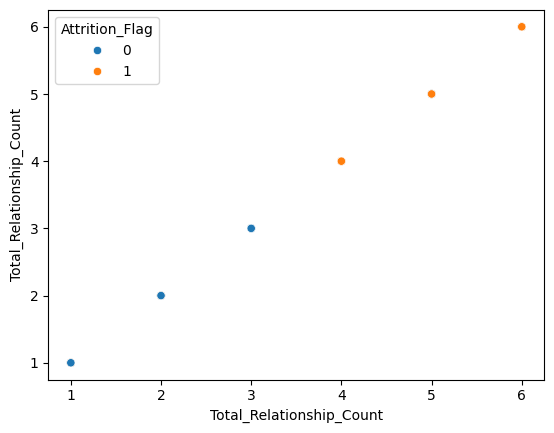

In [188]:
# create a scatterplot
sns.scatterplot(
    x=data.Total_Relationship_Count,
    y=data.Total_Relationship_Count,
    hue=data["Attrition_Flag"],
)
plt.show()

#Production Pipeline for the model

##Column Transformer

1.  We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns?

2.  Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.
This is useful for heterogeneous or columnar data in order to combine several feature extraction mechanisms or transformations into a single transformer.

3.  We will create 2 different pipelines, one for numerical columns and one for categorical columns

4.  For numerical columns, we will do missing value imputation as pre-processing

5.  For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

6.  We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [189]:
#View an incoming data frame to be put through pipeline
test_data = data.copy()
type(data)
test_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [190]:
# Separating target variable and other variables
X = test_data.drop(columns=["Attrition_Flag"])
Y = test_data["Attrition_Flag"]

In [191]:
# check head
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [192]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)
display(X_train)
display(y_train)

(7088, 19) (3039, 19)


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4124,50,F,1,Graduate,Married,Less than $40K,Blue,43,6,1,2,7985.000,0,7985.000,1.032,3873,72,0.674,0.000
4686,50,M,0,NaN,Divorced,$60K - $80K,Blue,36,3,3,2,5444.000,2499,2945.000,0.468,4509,80,0.667,0.459
1276,26,F,0,Graduate,Single,$40K - $60K,Blue,13,6,3,4,1643.000,1101,542.000,0.713,2152,50,0.471,0.670
6119,65,F,0,College,Single,Less than $40K,Blue,55,3,3,0,2022.000,0,2022.000,0.579,4623,65,0.548,0.000
2253,46,M,3,Graduate,Single,$80K - $120K,Blue,35,6,3,4,4930.000,0,4930.000,1.019,3343,77,0.638,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,50,F,2,Graduate,NaN,Less than $40K,Blue,36,5,2,2,1438.300,0,1438.300,0.658,2329,43,0.593,0.000
9338,56,M,0,Doctorate,Single,$80K - $120K,Blue,47,2,1,2,7204.000,0,7204.000,0.803,14042,113,0.766,0.000
9950,45,M,5,Uneducated,Single,$120K +,Silver,36,4,2,1,34516.000,0,34516.000,0.732,8603,84,0.615,0.000
1784,35,M,0,High School,Single,$80K - $120K,Gold,29,6,2,3,34516.000,1965,32551.000,1.044,2949,70,1.000,0.057


,Attrition_Flag
4124,0
4686,0
1276,0
6119,0
2253,0
...,...
4581,1
9338,0
9950,1
1784,0


##Create pipelines
###Create two pipeline objects and 1 ColumnTransformer object to host the pipes. ColumnTransformer “sends” the columns as a numpy array.

In [193]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # handle missing
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data


# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[  # List of (name, transformer, columns)
        ("num_step", numeric_transformer, numerical_features),
        ("cat_step", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
    n_jobs=-1,
    verbose=True,
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

##Create production pipeline
###Host nested pipes inside the column transformer for preprocessing tasks and then run the best model on the output data.

In [197]:
# Creating new pipeline with best parameters
production_model = Pipeline(
    steps=[
        ("pre", preprocessor),  # pipelines from above
        (
            "XGB",  # best model for prediction
            XGBClassifier(
                base_score=0.5,
                booster="gbtree",
                colsample_bylevel=1,
                colsample_bynode=1,
                colsample_bytree=1,
                eval_metric="logloss",
                gamma=0,
                device='cpu',
                importance_type="gain",
                interaction_constraints="",
                learning_rate=0.300000012,
                max_delta_step=0,
                max_depth=6,
                min_child_weight=1,
                missing=np.nan,
                monotone_constraints="()",
                n_estimators=100,
                n_jobs=4,
                num_parallel_tree=1,
                random_state=1,
                reg_alpha=0,
                reg_lambda=1,
                scale_pos_weight=1,
                subsample=1,
                tree_method="exact",
                validate_parameters=1,
                verbosity=None,
            ),
        ),
    ]
)

In [195]:
# view pipeline
print(production_model[0])
display(type(production_model))

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_step',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Customer_Age', 'Dependent_count',
                                  'Months_on_book', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio']),
                                ('cat_step',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='

sklearn.pipeline.Pipeline

### Test set final performance

In [198]:
# Fit the model on training data
production=production_model.fit(X_test, y_test.values)
print(production)


Pipeline(steps=[('pre',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_step',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
            

In [199]:
attrition_param = pd.DataFrame({'Attrition Parameters ':['Customer Age', 'Gender', 'Dependents_No','Educational Level', 'Marital Status','Income Level',
                                    'Card type','Months of Book','Total_Relationship_Count','Credit_Limit','Total_Revolving_Bal',
                                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio', 'No of Products']
                           ,'Indicators':['43 to 48 years old','Females','3 Dependents','Graduate','Married','Less than $40k','Blue & Platinum Cardholders',
                                      '36 to 39 months','3 Contacts Counts_12_mon','$1,438.30','$0.00','$1,438.30','0.6%','$2108-$2312','40-44','0.5-0.6%','0.00%', '2-3 products']}
                          ,index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
print(' Attrition Indicators')
print("*" *22)
attrition_param

 Attrition Indicators
**********************


,Attrition Parameters,Indicators
1,Customer Age,43 to 48 years old
2,Gender,Females
3,Dependents_No,3 Dependents
4,Educational Level,Graduate
5,Marital Status,Married
6,Income Level,Less than $40k
7,Card type,Blue & Platinum Cardholders
8,Months of Book,36 to 39 months
9,Total_Relationship_Count,3 Contacts Counts_12_mon
10,Credit_Limit,"$1,438.30"


# Business Insights and Conclusions

***From the attritable parameter table above, the following have been deduced:***

1.  Female bank customers churn the most with a percentage of 11.4% compared to males who have a percentage of 9%.

2.  Bank customers between the ages of 43 and 48 age group have a higher churn percentage than other age groups in the dataset.

3.  Customers who are married and have 3 nos of dependents are going to churn

4.  Bank customers with Blue and Platinum card types churn more with a percentage of 5.5% than others.

5.  Customers whose educational level is Graduate are more likely to attrite than others.

6.  Bank customers who have 36 to 39 months on book are more likely to churn.

7.  Customers who have less than $40000 per anum income level are more likely to churn than others

8.  Bank customer who have had 3 number of contact counts are more than likely to churn.

9.  Bank customers whose credit limit and average open to buy amount
is around $1430 are more likely to churn

10. Bank customers who purchased 2-3 products through the bank have a larger churn percentage than other categories

11.  We need to take note of customers who have between $2108 and $2312 total volume of transaction, because they are more likely to churn.

12.  Customers who have between 40-44 counts of transactions in the review period are more likely to churn.



#Recommendations:

1.  Bank should connect with the customer more often, and provide the customer with various offers and schemes to increase relationships of the customer with the bank

2.  Bank should offer cashback schemes on credit cards on a wide spectrums that will include many stores and businesses, which might encourage the customers to continue using the credit card more often

3.  Bank should also offer credit limit increase for the customers who are regularly using their credit cards. This would definitely increase the credit card spends/transaction amounts.

4.  0% interest EMI ***(equated monthly installment)*** on credit card is also another offer that can be provided to customers to encourage them to buy products of higher cost with their credit card, and convert the expenditure to EMI. This will increase the total transaction amount as well as transaction counts of the customers in a given cut-off period. Further, this would have a simultaneous effect on the rovilving balance as well.

5.  Along with the available types of cards, bank can introduce credit cards specifically directed to influence more online shopping (with certain percentage %ge cashback offers) or online food ordering on Doordash, Ubereats etc. This would geometrically increase the card usage per period and would make it nearly difficult for the customers to churn the card.

6.  With our model, it is expediently possible to predict which customers are likely to attrite. Also according to the predicted probability, so arrangements should be made for the marketting department to reach through different advertising schemes to at least top 20-30% customers in order to show them new credit card offers, increased credit limit, newly opened cashback regimes et cetera. This can be used as a pilot program to try retain these customers and afterwards take it to everybody else.

In [200]:
!pip install nbconvert

In [204]:
%%shell
jupyter nbconvert --to html '/content/drive/My Drive/Project 3/UTA - AIML/Project 3/Samson_Akomolafe_Machine_Learning_Project_3ai.ipynb'

[NbConvertApp] WARNING | pattern '/content/drive/My Drive/Project 3/UTA - AIML/Project 3/Samson_Akomolafe_Machine_Learning_Project_3ai.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questi

CalledProcessError: Command 'jupyter nbconvert --to html '/content/drive/My Drive/Project 3/UTA - AIML/Project 3/Samson_Akomolafe_Machine_Learning_Project_3ai.ipynb'
' returned non-zero exit status 255.

***